<a href="https://colab.research.google.com/github/Turskov/PythonCourseKupno/blob/main/%D0%92%D0%9A%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импортирование библиотек

In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
print(tf.__version__)

2.9.2


# Начальные данные

In [147]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
X_bp = pd.read_excel('/content/drive/MyDrive/X_bp.xlsx', index_col = 0)
X_bp

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [149]:
X_bp.drop(X_bp.index[0:23], inplace = True)
X_bp = X_bp.reset_index(drop = True)

In [150]:
X_nup = pd.read_excel('/content/drive/MyDrive/X_nup.xlsx', index_col = 0)
X_nup

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.0,4.000000,57.000000
1.0,0.0,4.000000,60.000000
2.0,0.0,4.000000,70.000000
3.0,0.0,5.000000,47.000000
4.0,0.0,5.000000,57.000000
...,...,...,...
1035.0,90.0,8.088111,47.759177
1036.0,90.0,7.619138,66.931932
1037.0,90.0,9.800926,72.858286
1038.0,90.0,10.079859,65.519479


In [151]:
X_nup.drop(X_nup.index[0^40], inplace = True)
X_nup = X_nup.reset_index(drop = True)

# Объединение данных

In [152]:
db = X_bp.merge(X_nup, left_index = True, right_index = True, how = 'inner')
db = X_nup.join(X_bp, how = 'inner')
db

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,4.000000,57.000000,2.587348,1953.274926,1136.596135,137.627420,22.344534,234.716883,555.893453,80.803222,2587.342983,246.613117
1,0.0,4.000000,60.000000,2.499918,1942.595777,901.519947,146.252208,23.081757,351.231874,864.725484,76.178075,3705.672523,226.222760
2,0.0,4.000000,70.000000,2.046471,2037.631811,707.570887,101.617251,23.146393,312.307205,547.601219,73.817067,2624.026407,178.198556
3,0.0,5.000000,47.000000,1.856476,2018.220332,836.294382,135.401697,26.435515,327.510377,150.961449,77.210762,2473.187195,123.344561
4,0.0,5.000000,57.000000,3.305535,1917.907506,478.286247,105.786930,17.874100,328.154579,526.692159,72.345709,3059.032991,275.575880
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,90.0,7.626517,45.148175,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
996,90.0,5.652525,53.622746,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
997,90.0,7.812506,62.702042,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
998,90.0,4.843831,40.734359,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


# Предобработка и анализ данных

In [153]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1000 non-null   float64
 1   Шаг нашивки                           1000 non-null   float64
 2   Плотность нашивки                     1000 non-null   float64
 3   Соотношение матрица-наполнитель       1000 non-null   float64
 4   Плотность, кг/м3                      1000 non-null   float64
 5   модуль упругости, ГПа                 1000 non-null   float64
 6   Количество отвердителя, м.%           1000 non-null   float64
 7   Содержание эпоксидных групп,%_2       1000 non-null   float64
 8   Температура вспышки, С_2              1000 non-null   float64
 9   Поверхностная плотность, г/м2         1000 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1000 non-null   float64
 11  Прочность при раст

In [154]:
#Установка никальный значений и вывод 5 последних значений на экран
for column in db.columns:
  print(f'Колонка {column}')
  print(sorted(db[column].unique())[-5:])

Колонка Угол нашивки, град
[0.0, 90.0]
Колонка Шаг нашивки
[13.732404403383, 14.0332153037961, 14.0513828180002, 14.3764512763632, 14.4405218753969]
Колонка Плотность нашивки
[89.8766155103646, 92.0421393826707, 92.9634919477473, 98.2026027528147, 103.988901301494]
Колонка Соотношение матрица-наполнитель
[5.3141436851035, 5.42513947440363, 5.45295943131032, 5.45556617827335, 5.59174159869754]
Колонка Плотность, кг/м3
[2182.75182183283, 2184.49319952038, 2192.29763744164, 2192.73878348, 2207.77348061119]
Колонка модуль упругости, ГПа
[1588.67721742116, 1615.09697286127, 1649.41570587587, 1815.86516990736, 1911.53647700054]
Колонка Количество отвердителя, м.%
[191.053003718703, 192.334469461448, 192.705385447053, 192.85170183308, 198.953207190451]
Колонка Содержание эпоксидных групп,%_2
[28.3249680236444, 28.6201157898466, 28.8489016191684, 28.9074700337636, 28.9550943746499]
Колонка Температура вспышки, С_2
[386.067991779505, 396.898222222153, 397.151290856661, 403.652860876814, 413.273

In [155]:
#Проверка данных на проверки
db.isna().sum()

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

# Основные характеристики

In [156]:
db.describe()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,43.290000,6.901107,57.115024,2.930612,1975.666791,739.950520,110.541116,22.243850,285.911287,483.024665,73.328462,2467.184290,218.386876
std,44.989999,2.572885,12.415994,0.913939,73.796817,330.327013,28.304470,2.406999,40.962756,280.811736,3.119584,485.624616,59.819777
min,0.000000,0.000000,0.000000,0.389403,1731.764635,2.436909,17.740275,14.254985,160.255843,0.603740,64.054061,1036.856605,33.803026
25%,0.000000,5.078152,49.683979,2.318526,1924.203433,498.438068,92.170589,20.558296,258.539199,268.057473,71.301753,2143.834592,179.190489
50%,0.000000,6.913444,57.300796,2.907832,1977.574305,741.148111,110.162666,22.230761,285.853960,452.972263,73.247594,2461.249253,217.277006
75%,90.000000,8.598579,65.040740,3.552539,2021.159498,962.851423,130.311975,23.982115,313.581449,694.210382,75.379739,2760.163022,257.495647
max,90.000000,14.440522,103.988901,5.591742,2207.773481,1911.536477,198.953207,28.955094,413.273418,1399.542362,82.682051,3848.436732,414.590628


In [157]:
db.columns

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Создание гистограмм

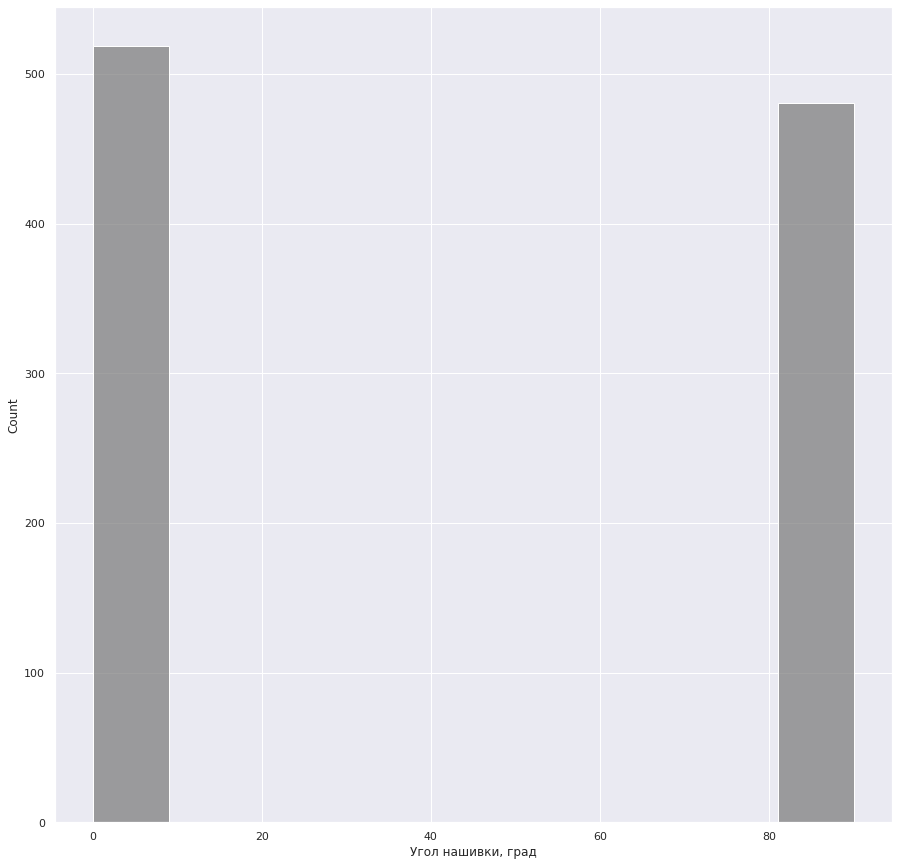

In [159]:
sns.histplot(db['Угол нашивки, град'], kde = False, bins = 10, color = 'grey')
sns.set(rc = {'figure.figsize':(15, 12)})

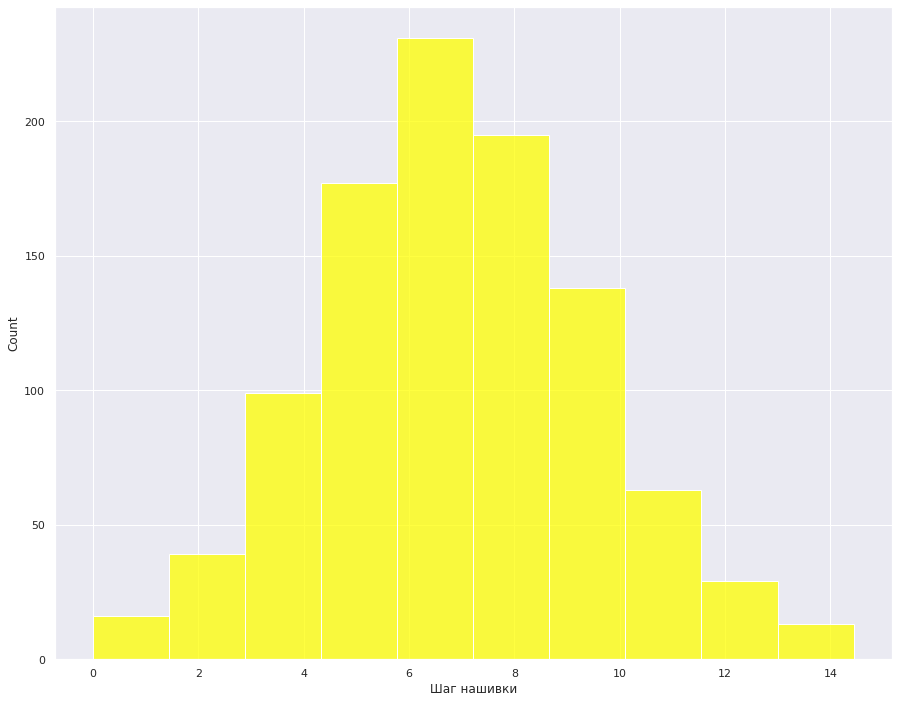

In [160]:
sns.histplot(db['Шаг нашивки'], kde = False, bins = 10, color = 'yellow')
sns.set(rc = {'figure.figsize':(15, 12)})

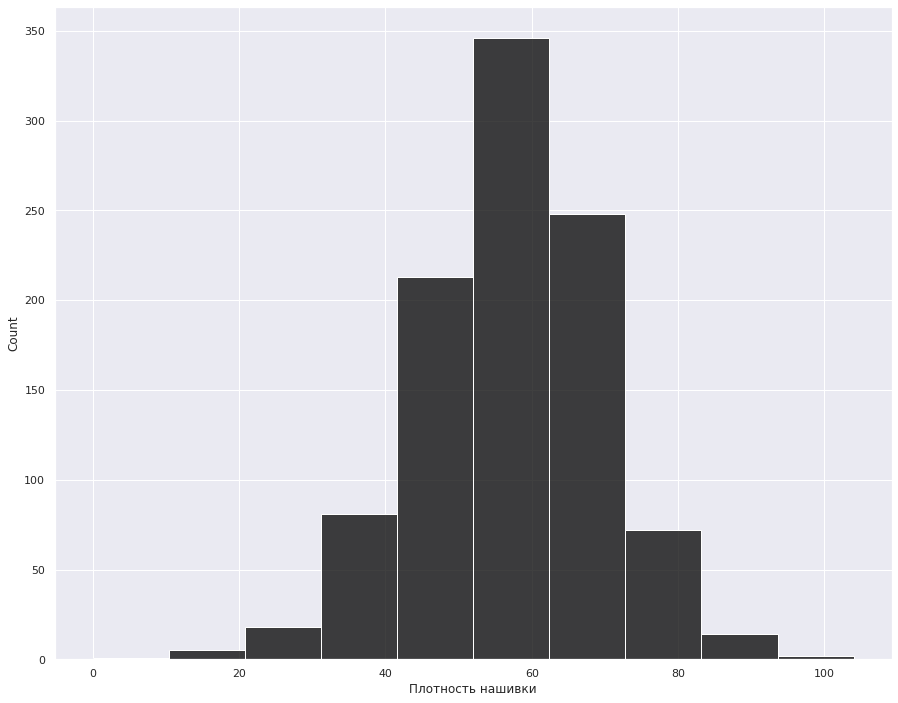

In [161]:
sns.histplot(db['Плотность нашивки'], kde = False, bins = 10, color = 'black')
sns.set(rc = {'figure.figsize':(15, 12)})

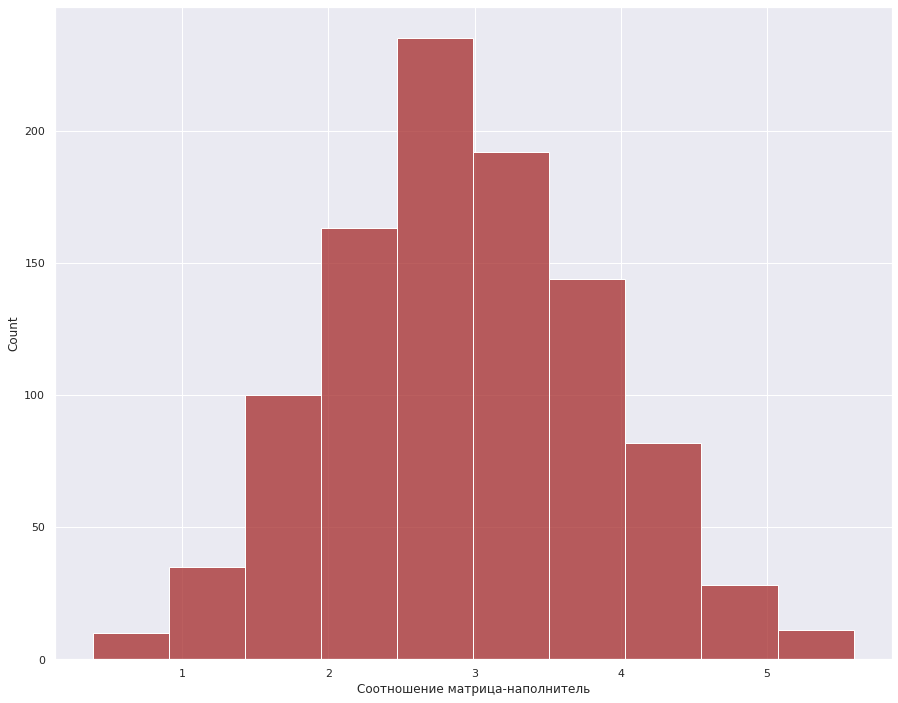

In [162]:
sns.histplot(db['Соотношение матрица-наполнитель'], kde = False, bins = 10, color = 'brown')
sns.set(rc = {'figure.figsize':(15, 12)})

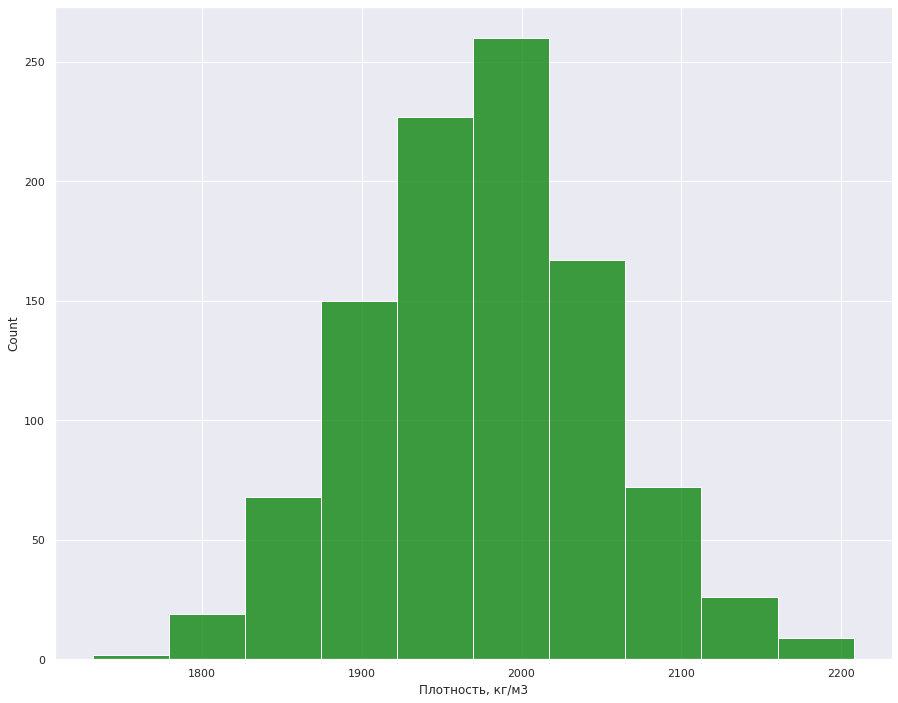

In [163]:
sns.histplot(db['Плотность, кг/м3'], kde = False, bins = 10, color = 'green')
sns.set(rc = {'figure.figsize':(15, 12)})

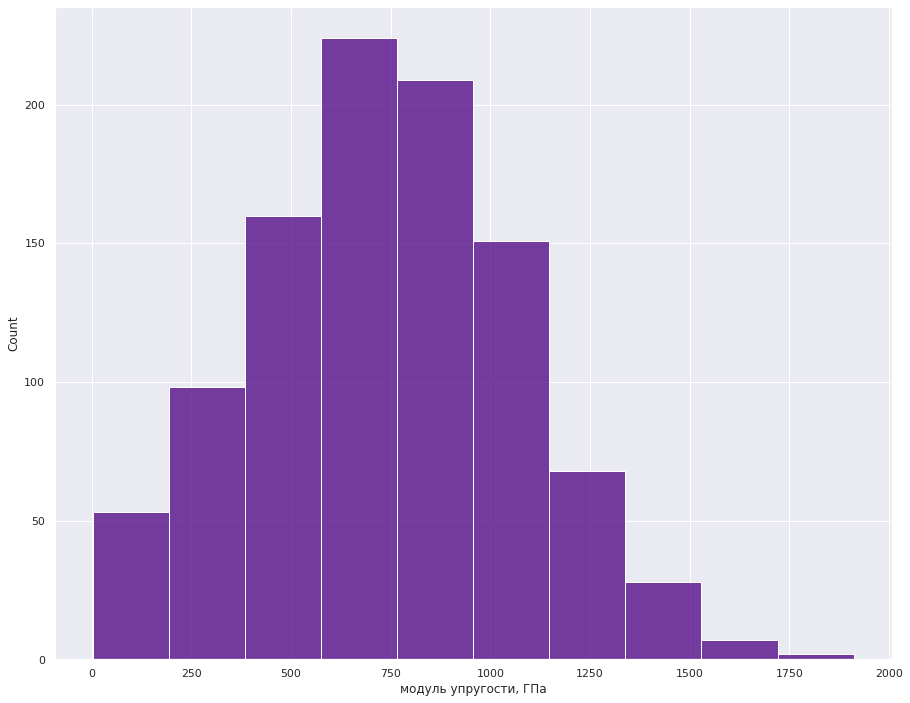

In [164]:
sns.histplot(db['модуль упругости, ГПа'], kde = False, bins = 10, color = 'indigo')
sns.set(rc = {'figure.figsize':(15, 12)})

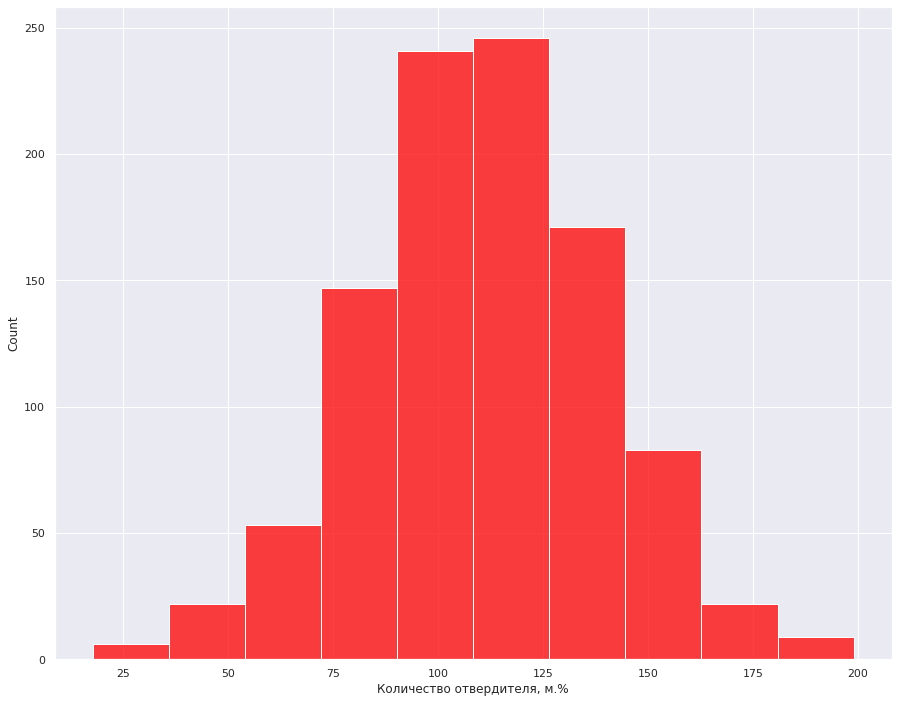

In [165]:
sns.histplot(db['Количество отвердителя, м.%'], kde = False, bins = 10, color = 'red')
sns.set(rc = {'figure.figsize':(15, 12)})

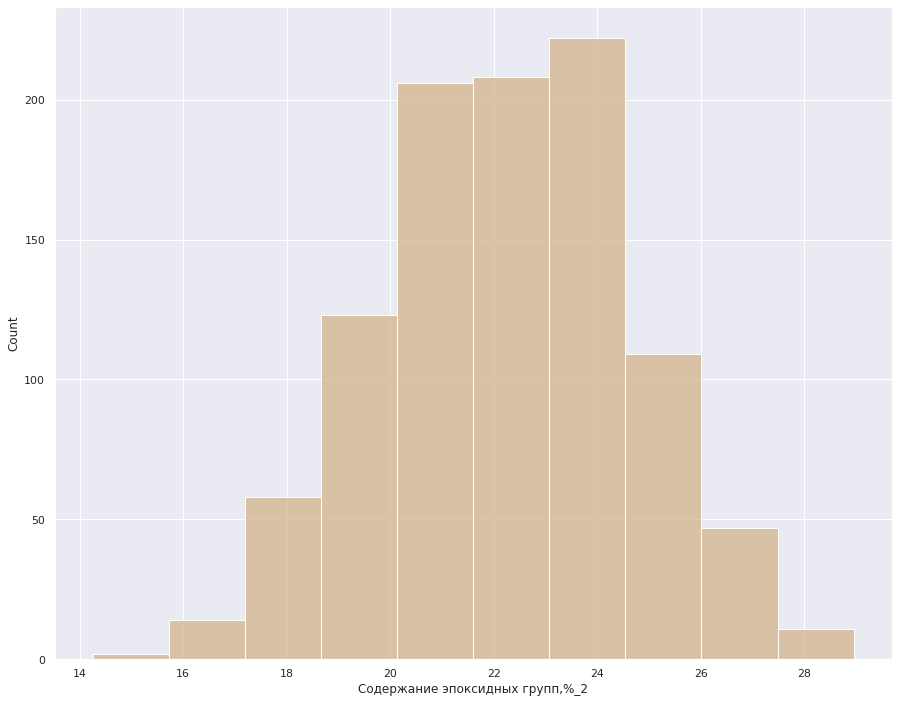

In [166]:
sns.histplot(db['Содержание эпоксидных групп,%_2'], kde = False, bins = 10, color = 'tan')
sns.set(rc = {'figure.figsize':(15, 12)})

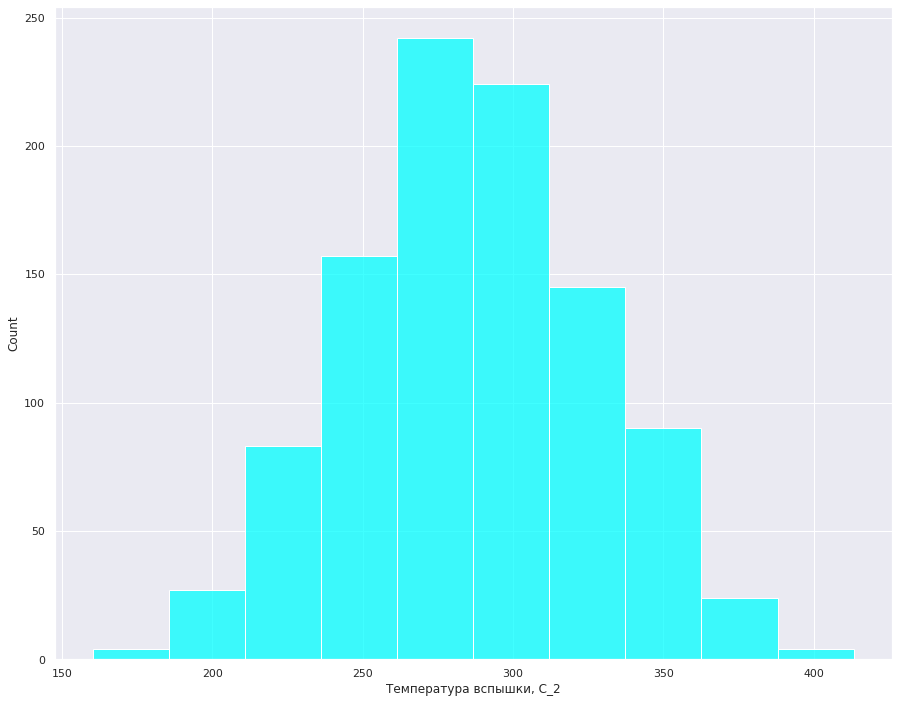

In [167]:
sns.histplot(db['Температура вспышки, С_2'], kde = False, bins = 10, color = 'aqua')
sns.set(rc = {'figure.figsize':(15, 12)})

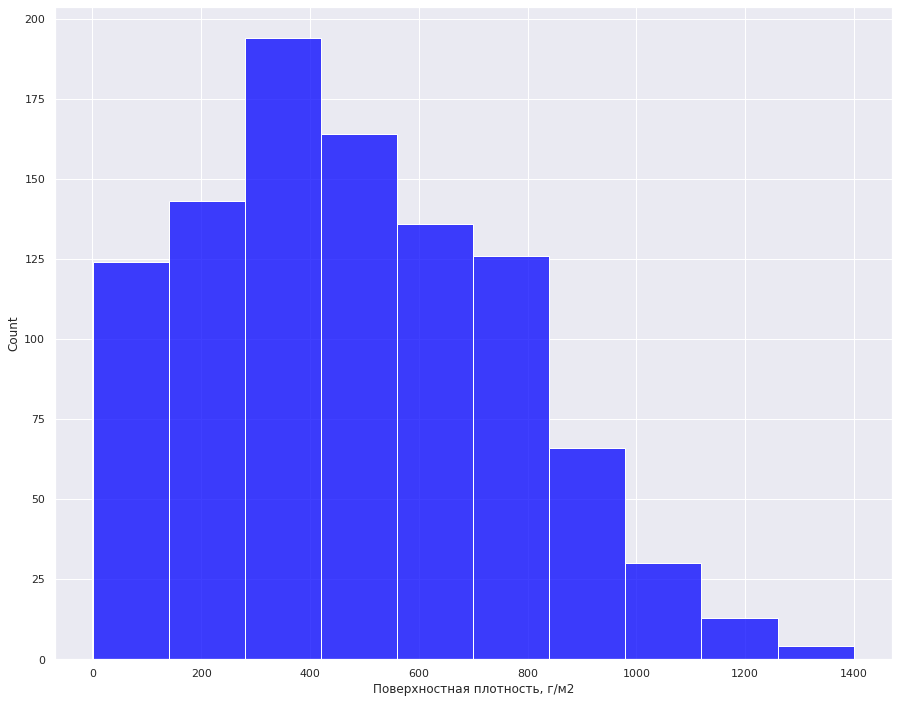

In [168]:
sns.histplot(db['Поверхностная плотность, г/м2'], kde = False, bins = 10, color = 'blue')
sns.set(rc = {'figure.figsize':(15, 12)})

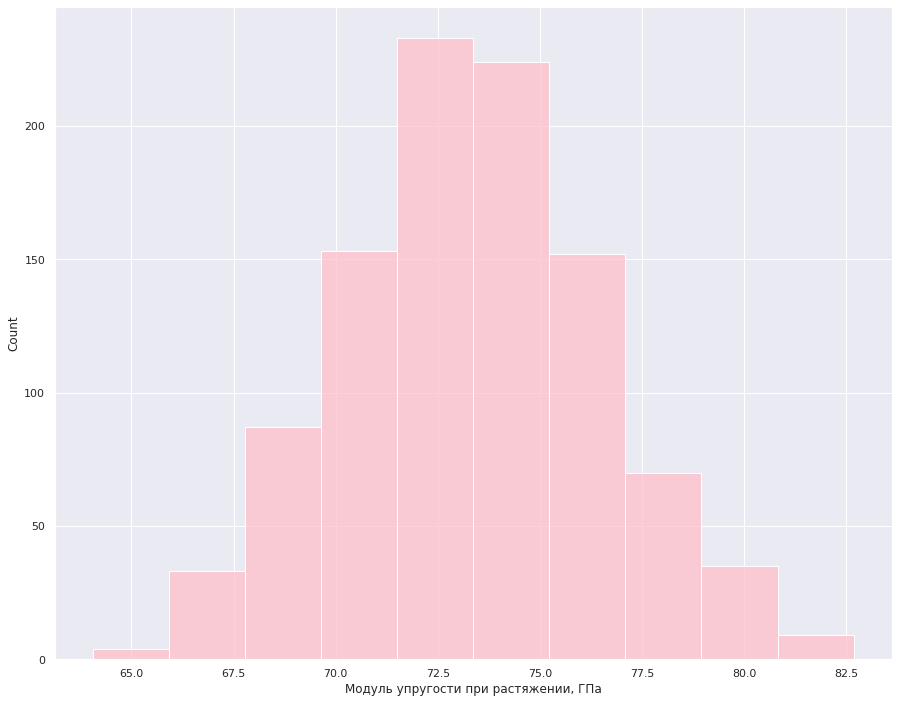

In [169]:
sns.histplot(db['Модуль упругости при растяжении, ГПа'], kde = False, bins = 10, color = 'pink')
sns.set(rc = {'figure.figsize':(15, 12)})

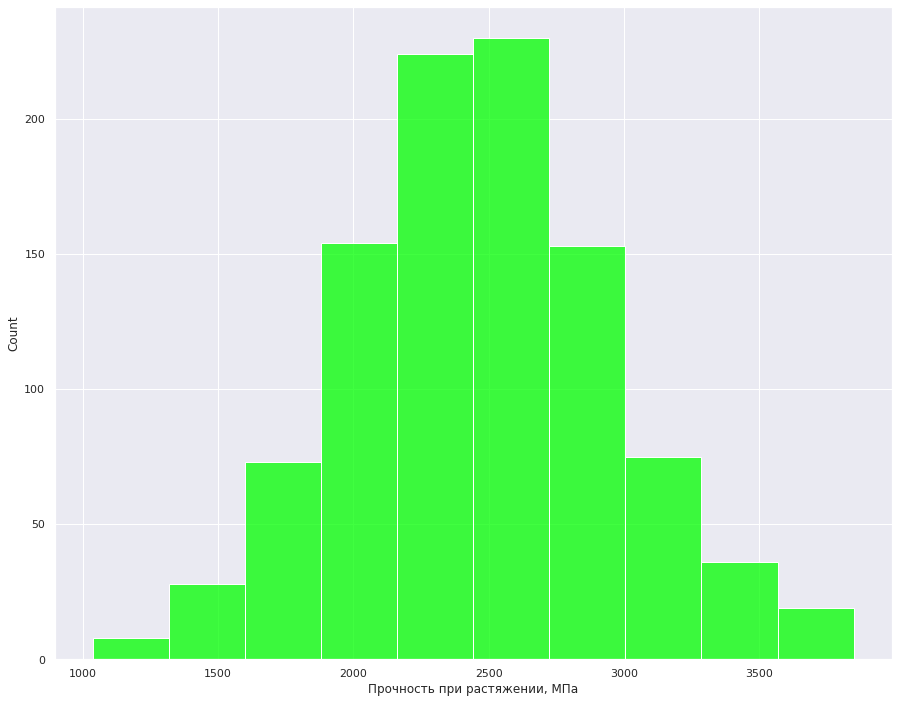

In [170]:
sns.histplot(db['Прочность при растяжении, МПа'], kde = False, bins = 10, color = 'lime')
sns.set(rc = {'figure.figsize':(15, 12)})

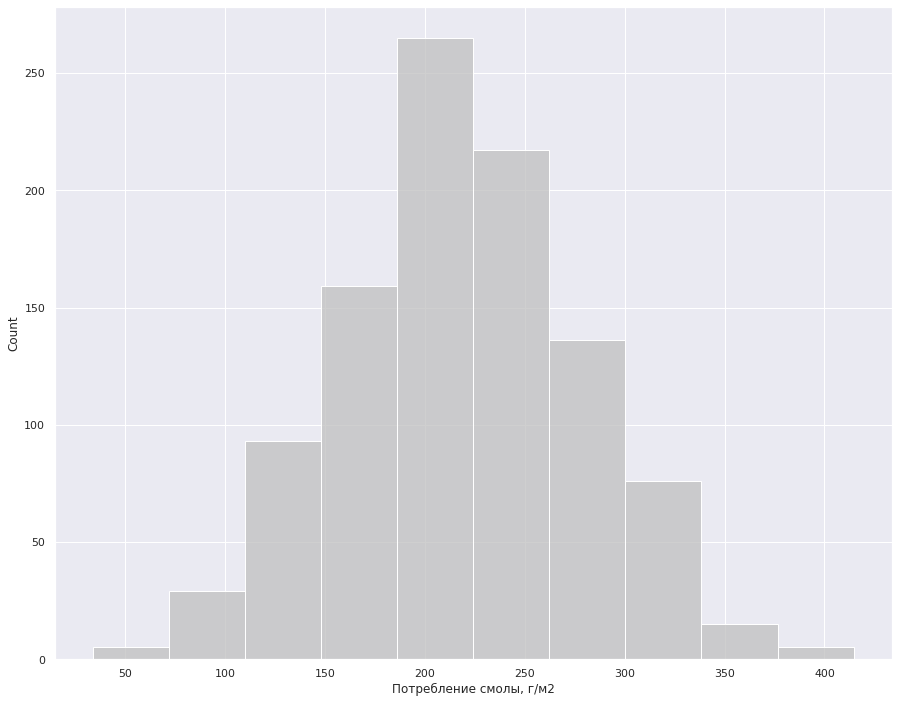

In [171]:
sns.histplot(db['Потребление смолы, г/м2'], kde = False, bins = 10, color = 'silver')
sns.set(rc = {'figure.figsize':(15, 12)})

Большинство характеристик имеет распределение близкое к нормальному.

Исключениями являются:

*   Поверхностная плотность, г/м2 - нормально распределение со смещением влево.
*   Количество отвердителя, м.% - нормально распределение со смещением влево.
* Угол нашивки, град - дискретное распределение.




# Создание диаграм "ящик с усами"

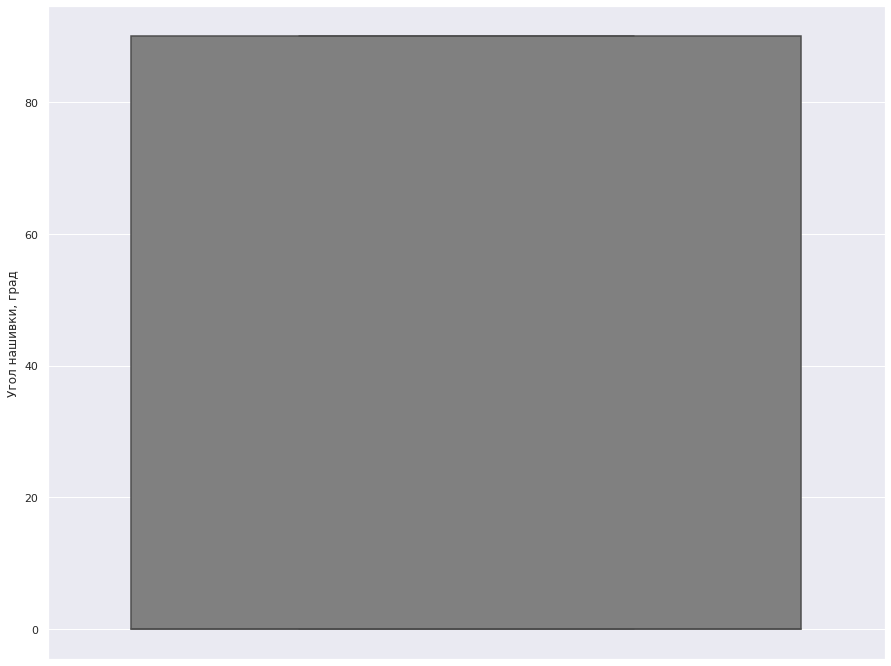

In [172]:
sns.boxplot(y = 'Угол нашивки, град', data = db, color = 'grey')

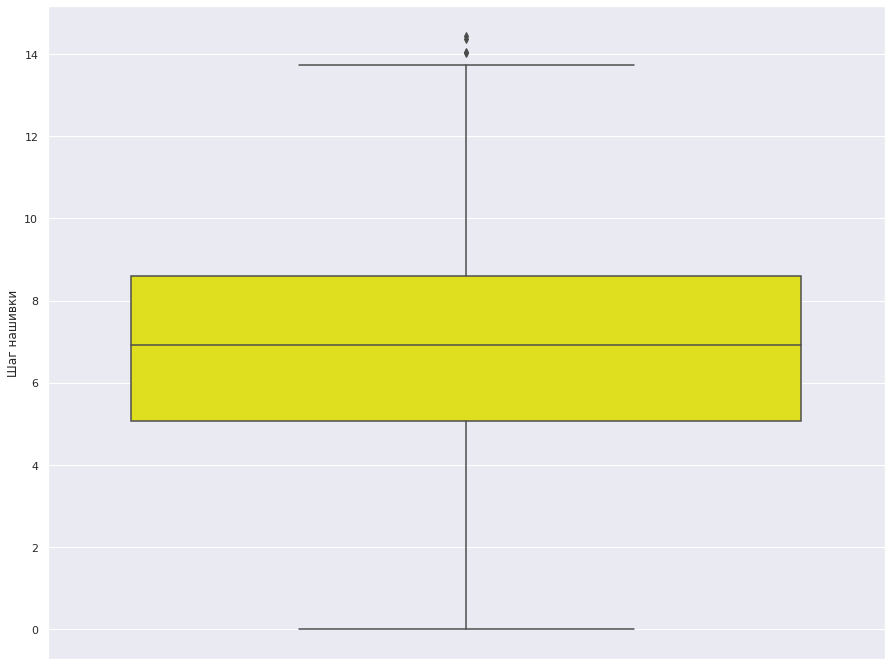

In [173]:
sns.boxplot(y = 'Шаг нашивки', data = db, color = 'yellow')

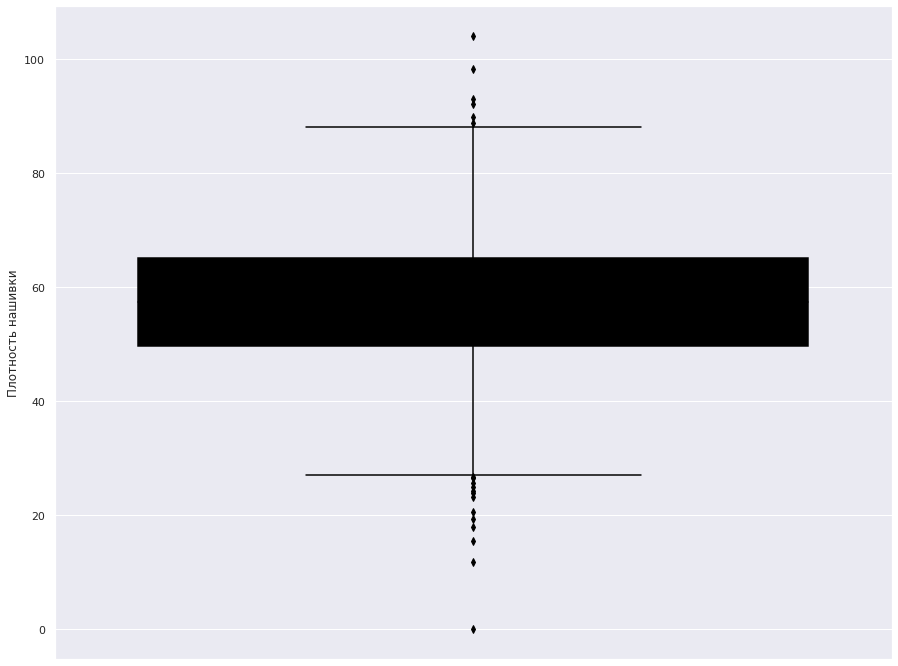

In [174]:
sns.boxplot(y = 'Плотность нашивки', data = db, color = 'black')

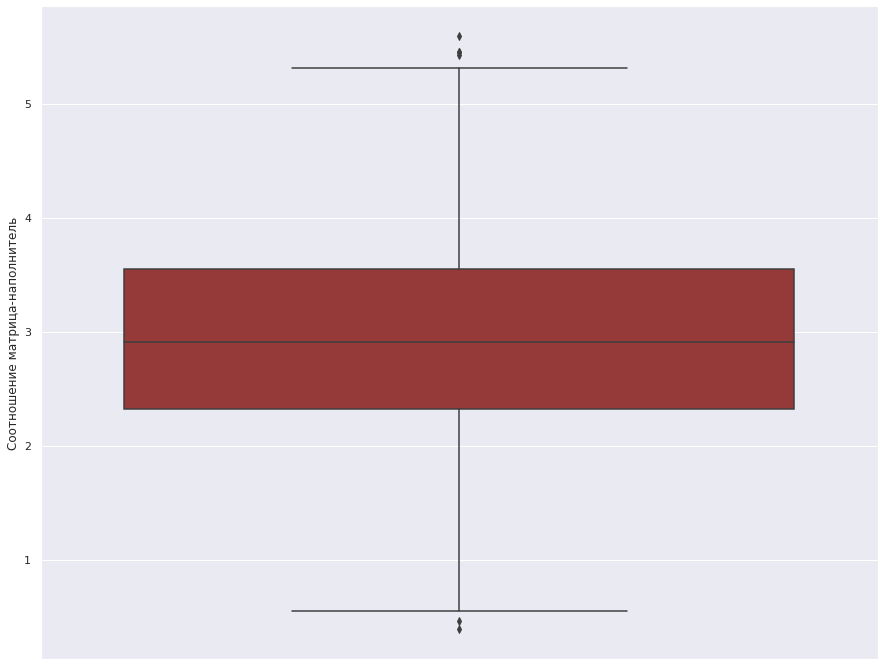

In [175]:
sns.boxplot(y = 'Соотношение матрица-наполнитель', data = db, color = 'brown')

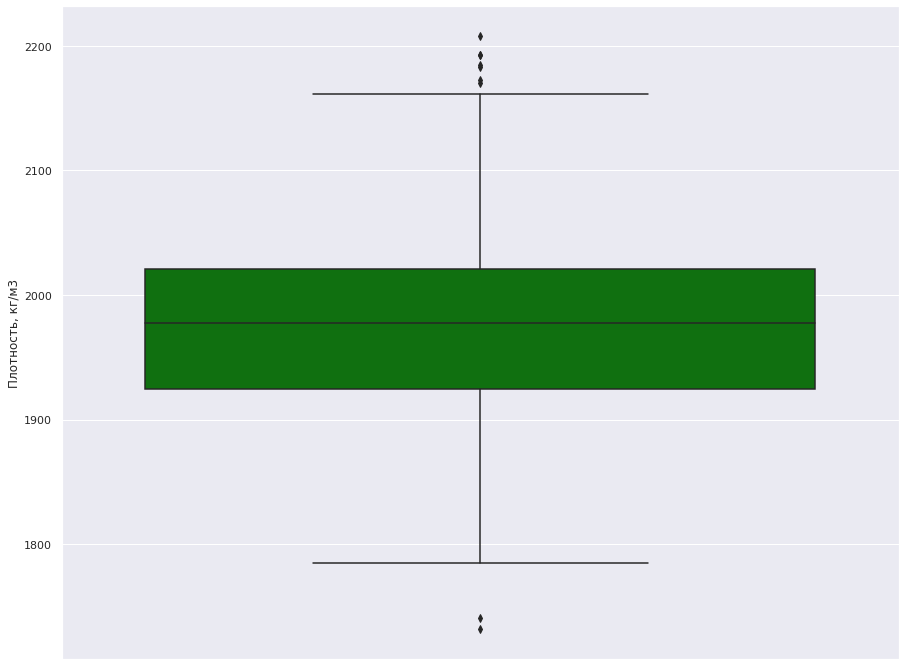

In [176]:
sns.boxplot(y = 'Плотность, кг/м3', data = db, color = 'green')

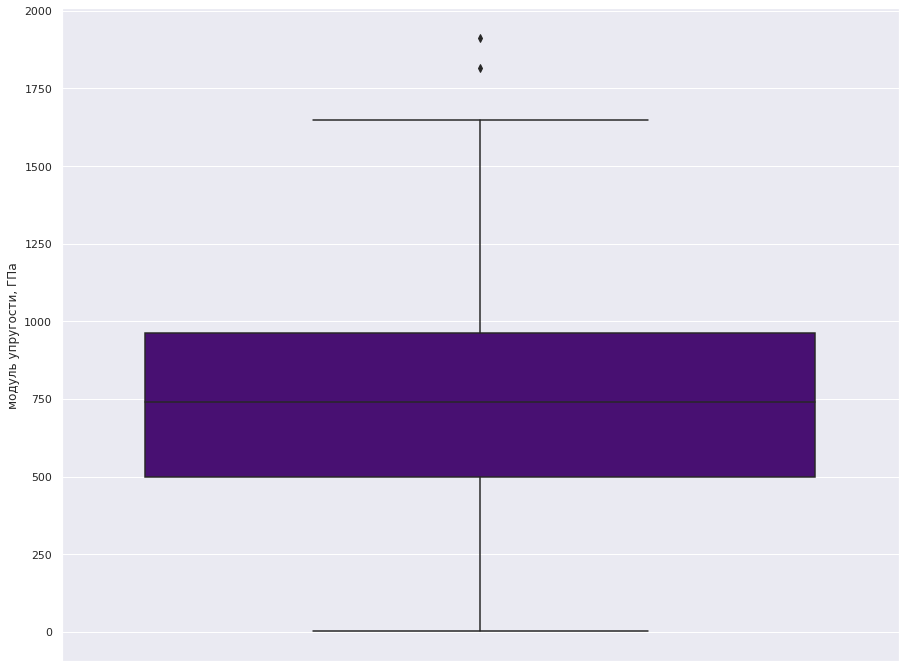

In [177]:
sns.boxplot(y = 'модуль упругости, ГПа', data = db, color = 'indigo')

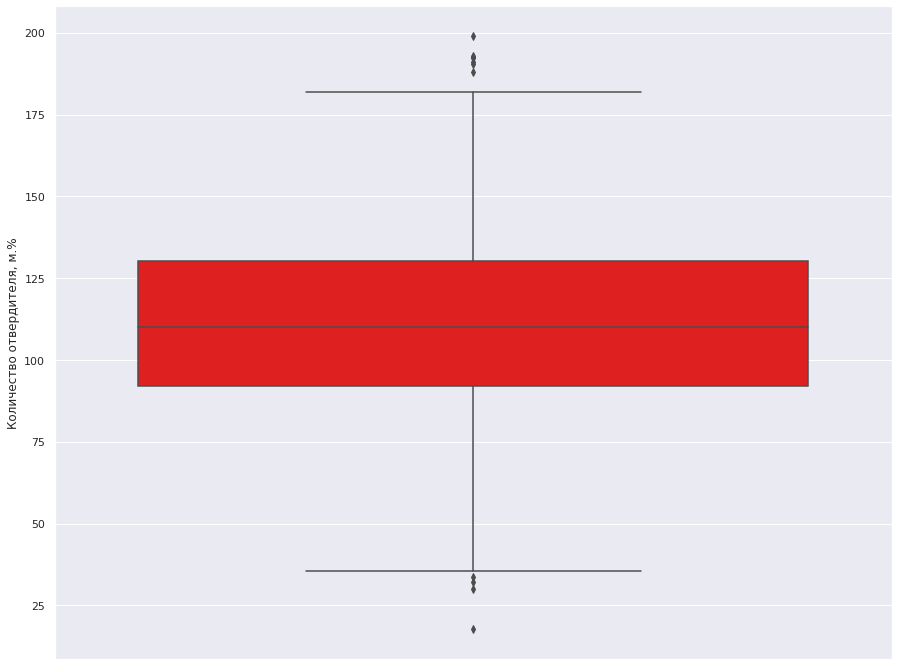

In [178]:
sns.boxplot(y = 'Количество отвердителя, м.%', data = db, color = 'red')

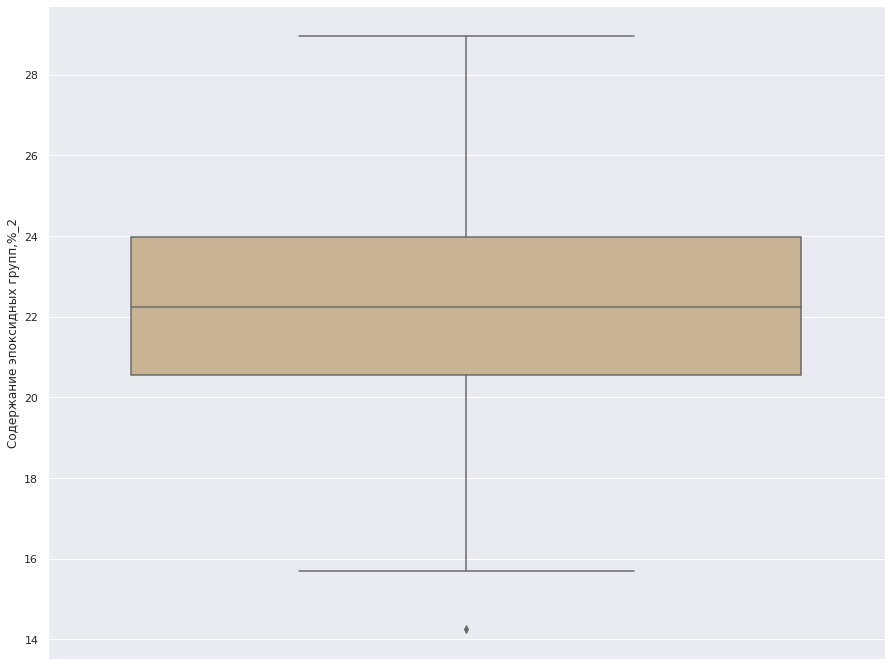

In [179]:
sns.boxplot(y = 'Содержание эпоксидных групп,%_2', data = db, color = 'tan')

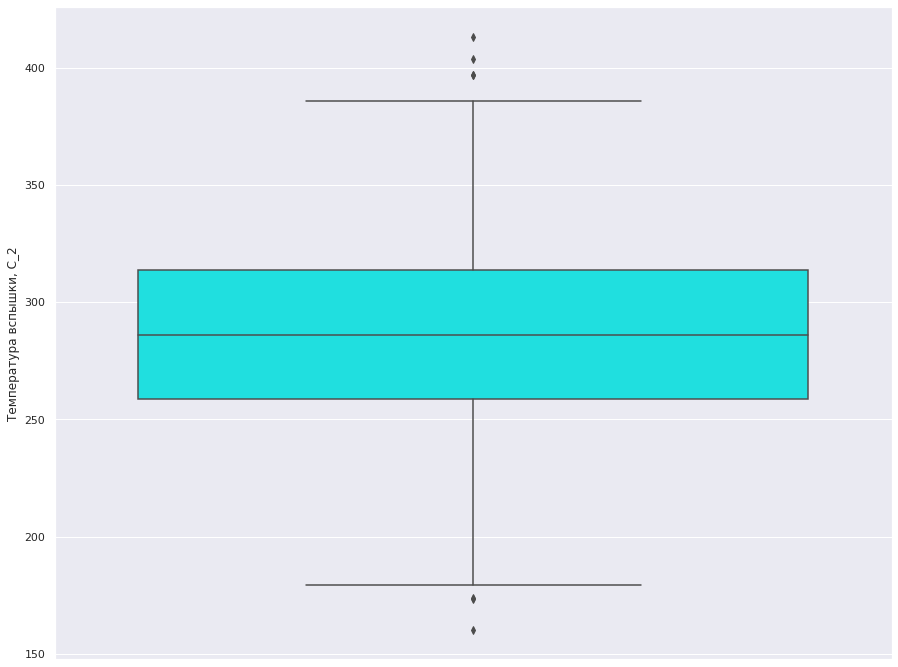

In [180]:
sns.boxplot(y = 'Температура вспышки, С_2', data = db, color = 'aqua')

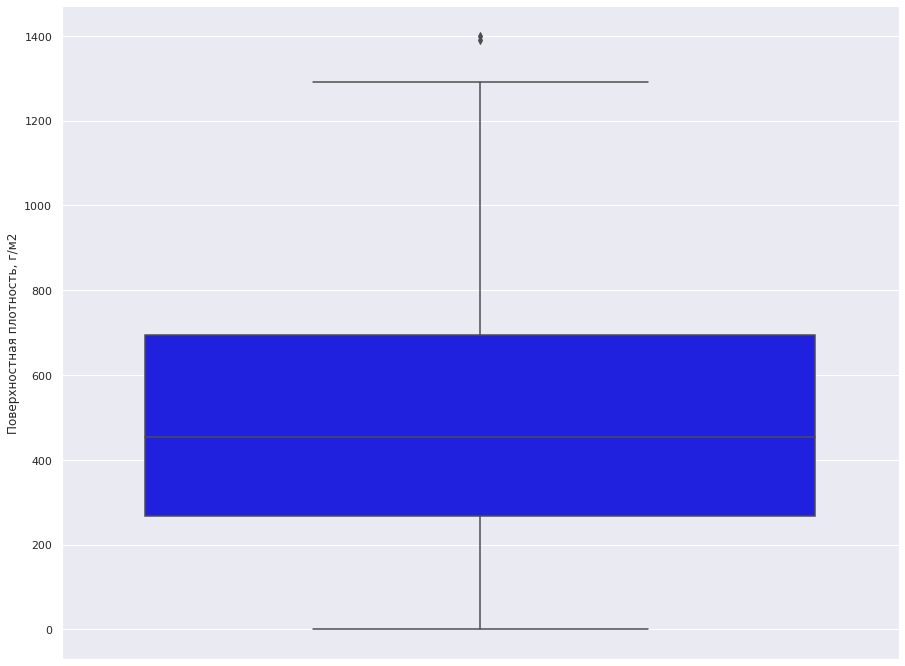

In [181]:
sns.boxplot(y = 'Поверхностная плотность, г/м2', data = db, color = 'blue')

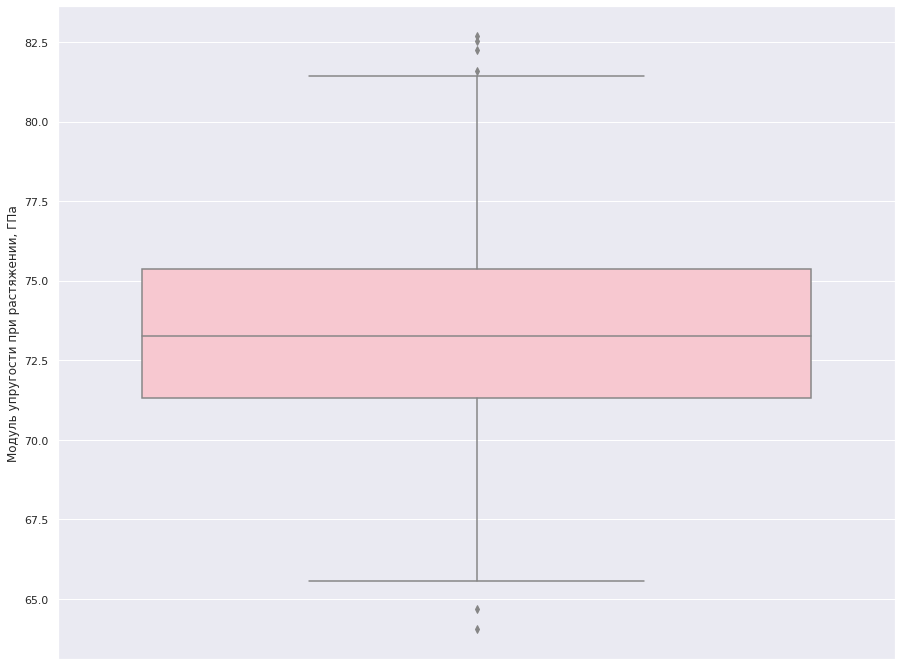

In [182]:
sns.boxplot(y = 'Модуль упругости при растяжении, ГПа', data = db, color = 'pink')

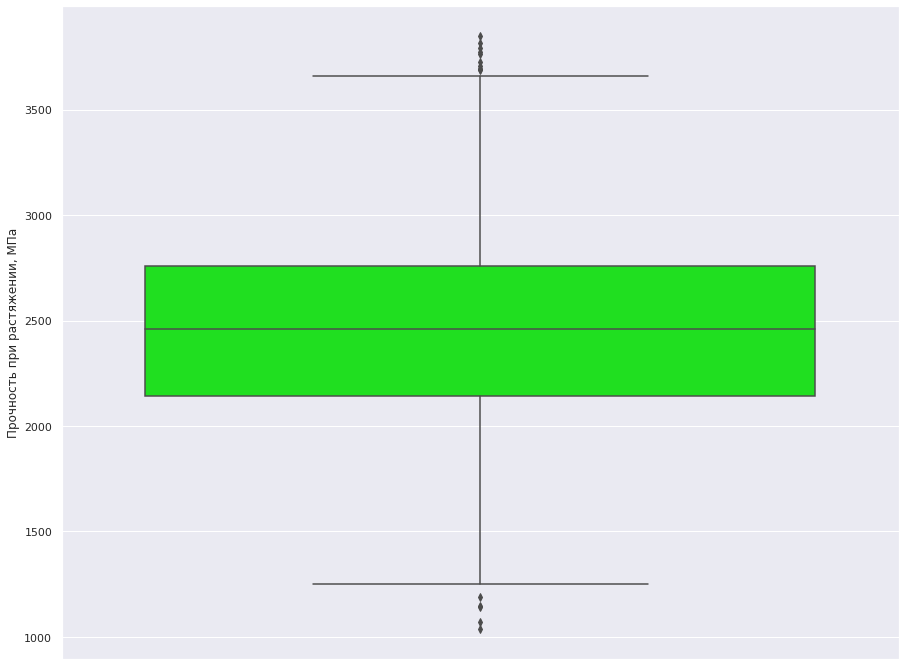

In [183]:
sns.boxplot(y = 'Прочность при растяжении, МПа', data = db, color = 'lime')

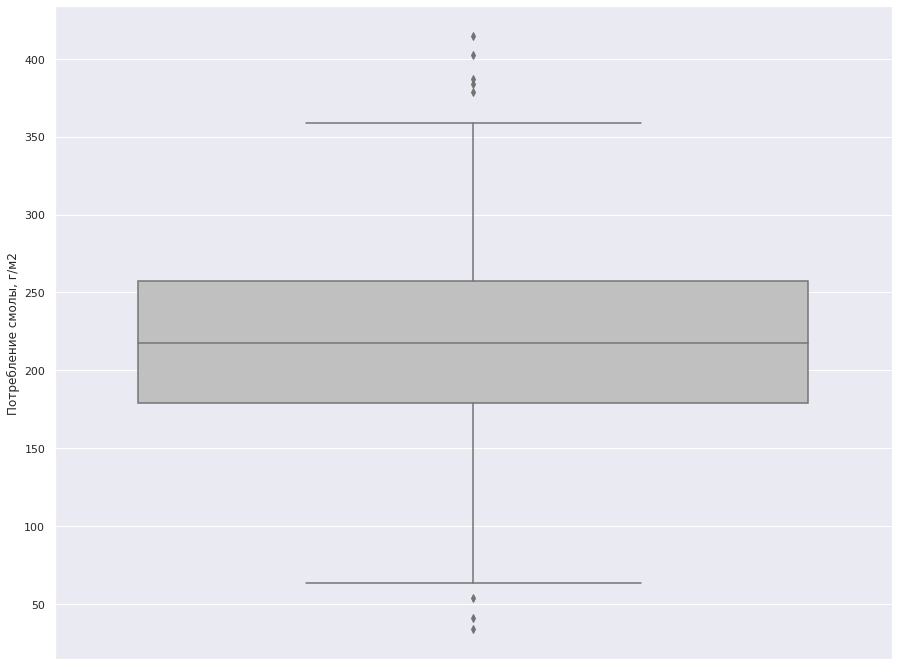

In [184]:
sns.boxplot(y = 'Потребление смолы, г/м2', data = db, color = 'silver')

# Построение графика рассеяния точек

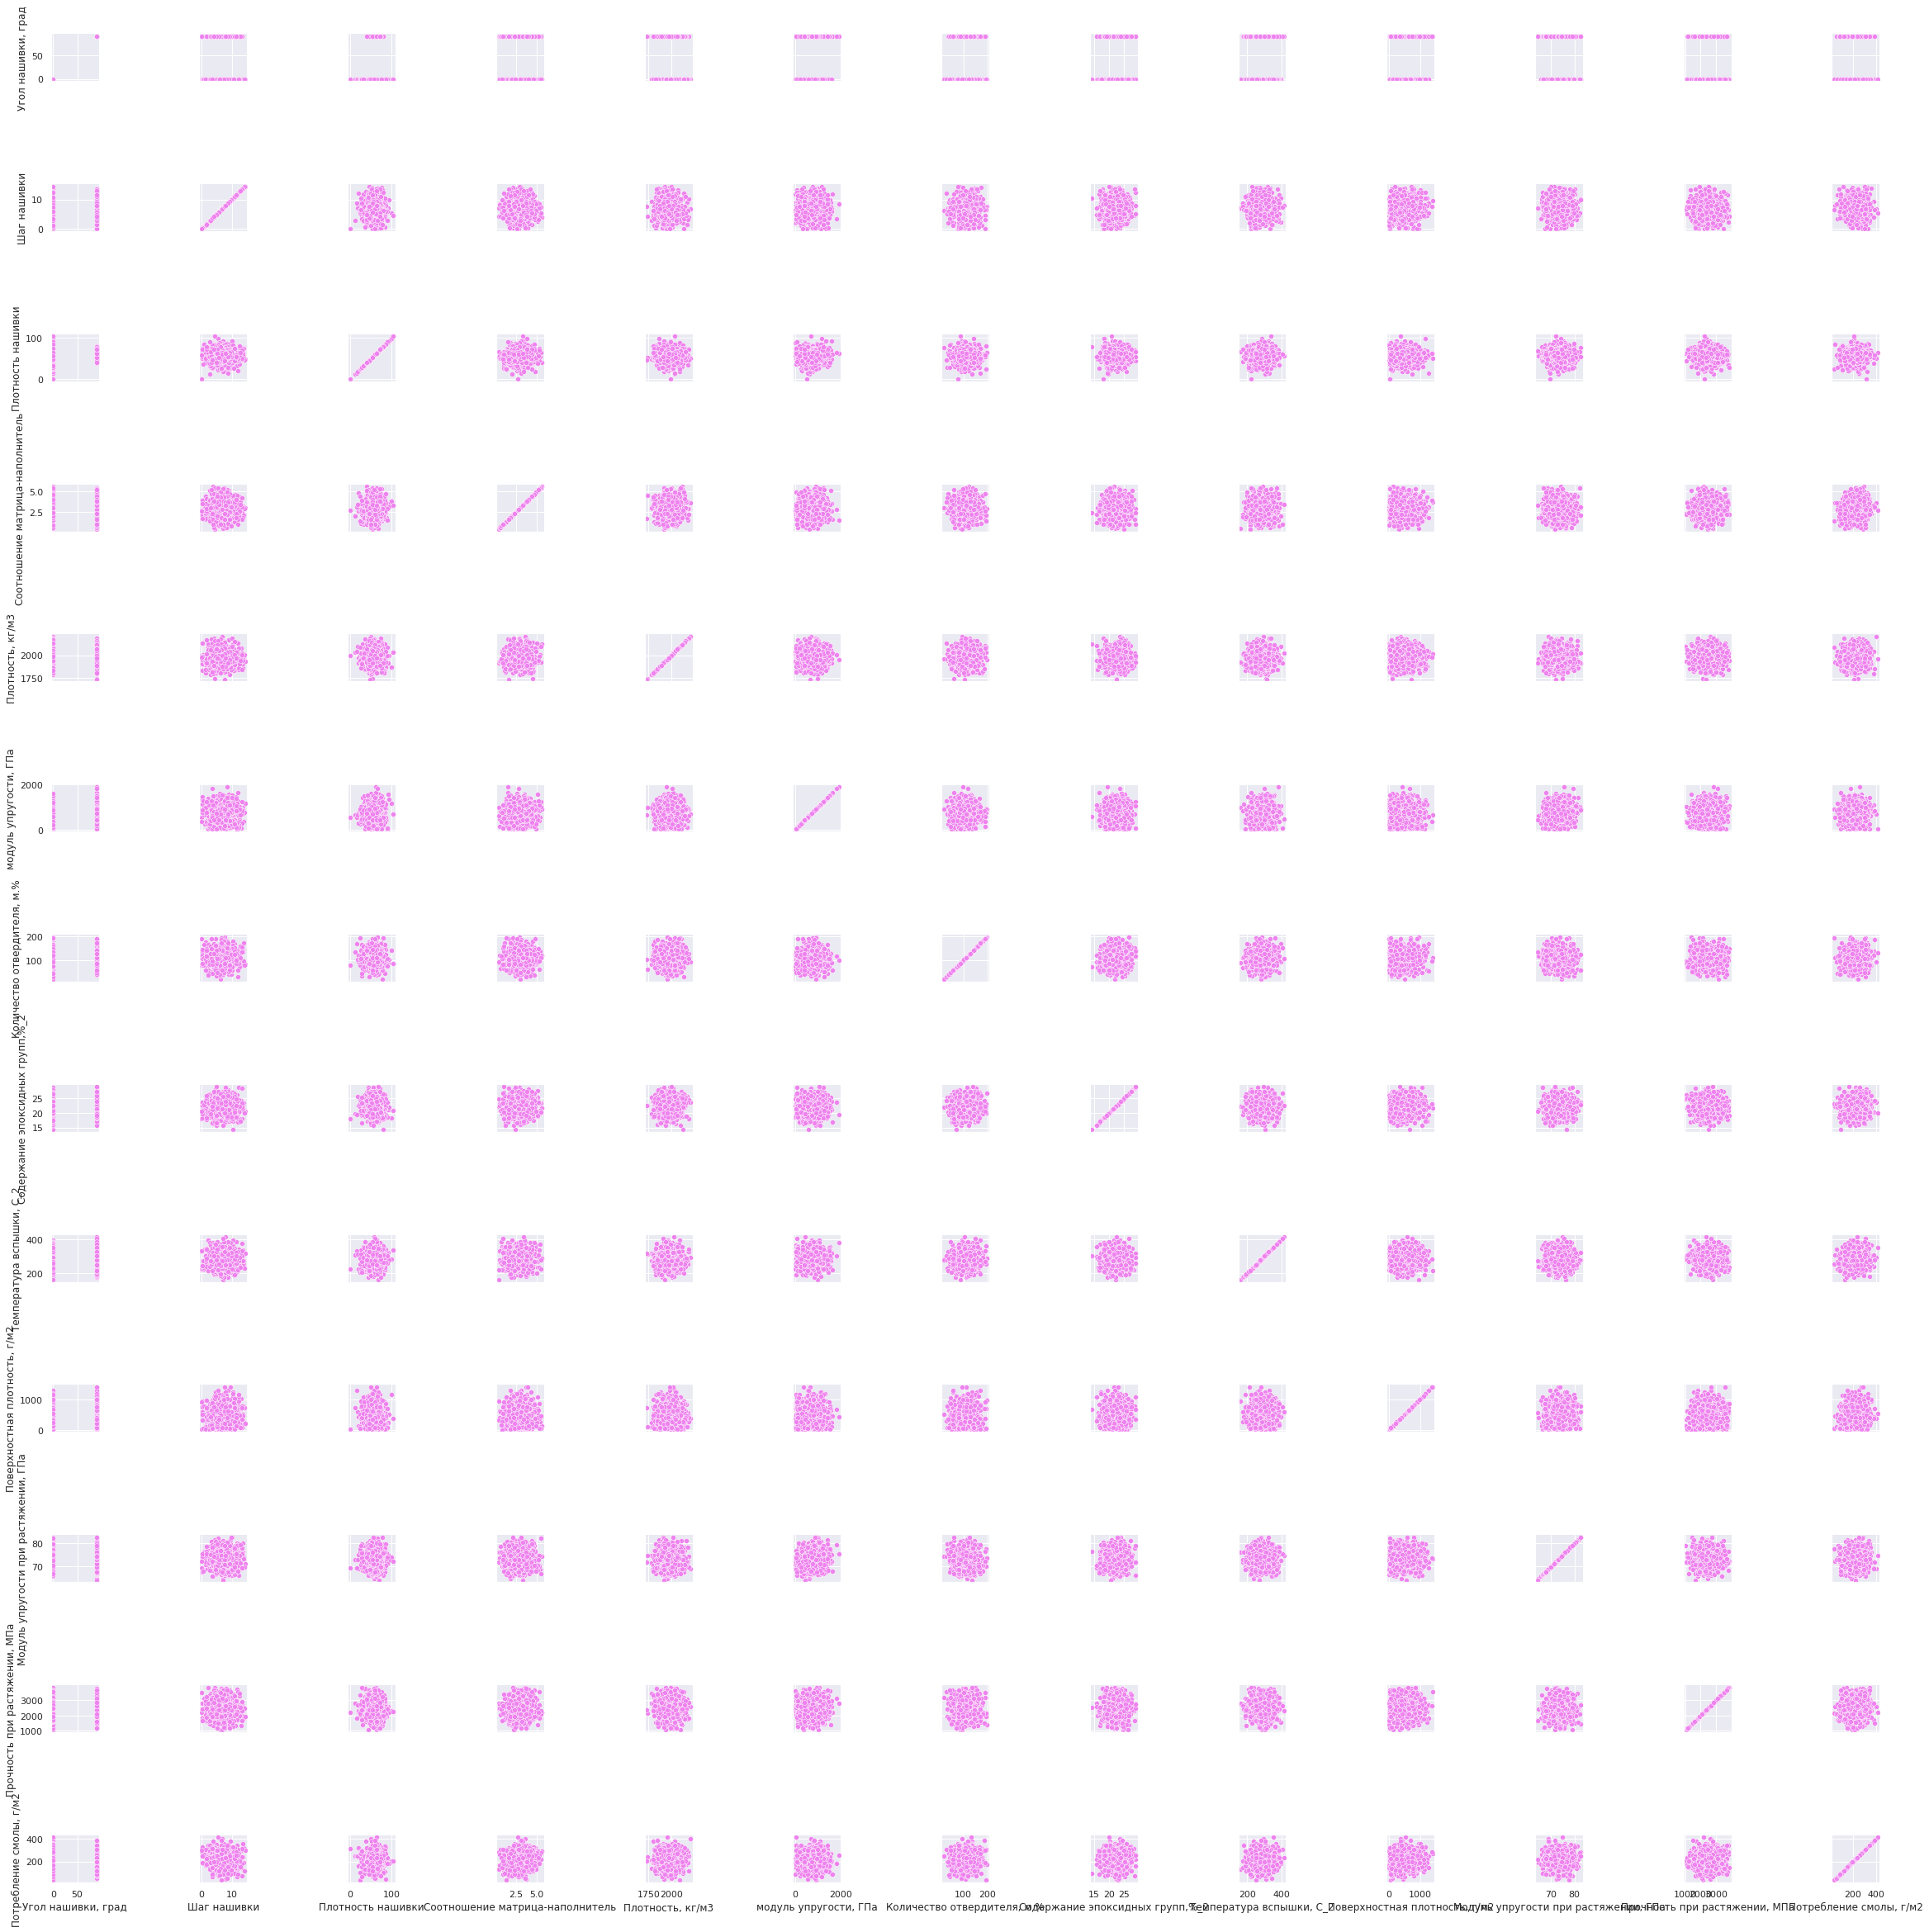

In [185]:
columns = db.columns
pg = sns.PairGrid(db[columns])
pg.map(sns.scatterplot, color = 'violet')

# Исследование данных с применением коэффициента корреляции.

In [186]:
db.corr()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
"Угол нашивки, град",1.000000,0.025591,0.107814,-0.006478,-0.039744,-0.027044,0.048233,-0.023273,-0.000842,0.017186,0.006328,0.009859,0.022552
Шаг нашивки,0.025591,1.000000,0.004465,-0.038880,-0.014824,-0.019395,0.020786,0.027925,-0.002470,0.026519,-0.025892,-0.010509,-0.047044
Плотность нашивки,0.107814,0.004465,1.000000,0.031776,0.000938,0.013079,-0.010918,-0.000105,0.008643,0.030197,0.031509,-0.065774,-0.028252
Соотношение матрица-наполнитель,-0.006478,-0.038880,0.031776,1.000000,0.011033,0.032246,-0.017575,0.027885,-0.011712,-0.011906,-0.017502,0.036288,0.078841
"Плотность, кг/м3",-0.039744,-0.014824,0.000938,0.011033,1.000000,-0.017544,-0.032137,-0.011680,-0.018260,0.038236,-0.020699,-0.074165,-0.027946
"модуль упругости, ГПа",-0.027044,-0.019395,0.013079,0.032246,-0.017544,1.000000,0.023490,-0.006186,0.031181,-0.017841,0.014482,0.048217,-0.007369
"Количество отвердителя, м.%",0.048233,0.020786,-0.010918,-0.017575,-0.032137,0.023490,1.000000,0.013484,0.081562,0.048636,-0.076936,-0.066785,0.008184
"Содержание эпоксидных групп,%_2",-0.023273,0.027925,-0.000105,0.027885,-0.011680,-0.006186,0.013484,1.000000,-0.008072,-0.007685,0.064757,-0.031613,0.015057
"Температура вспышки, С_2",-0.000842,-0.002470,0.008643,-0.011712,-0.018260,0.031181,0.081562,-0.008072,1.000000,0.015638,0.023145,-0.026122,0.061615
"Поверхностная плотность, г/м2",0.017186,0.026519,0.030197,-0.011906,0.038236,-0.017841,0.048636,-0.007685,0.015638,1.000000,0.014983,0.013333,0.001071


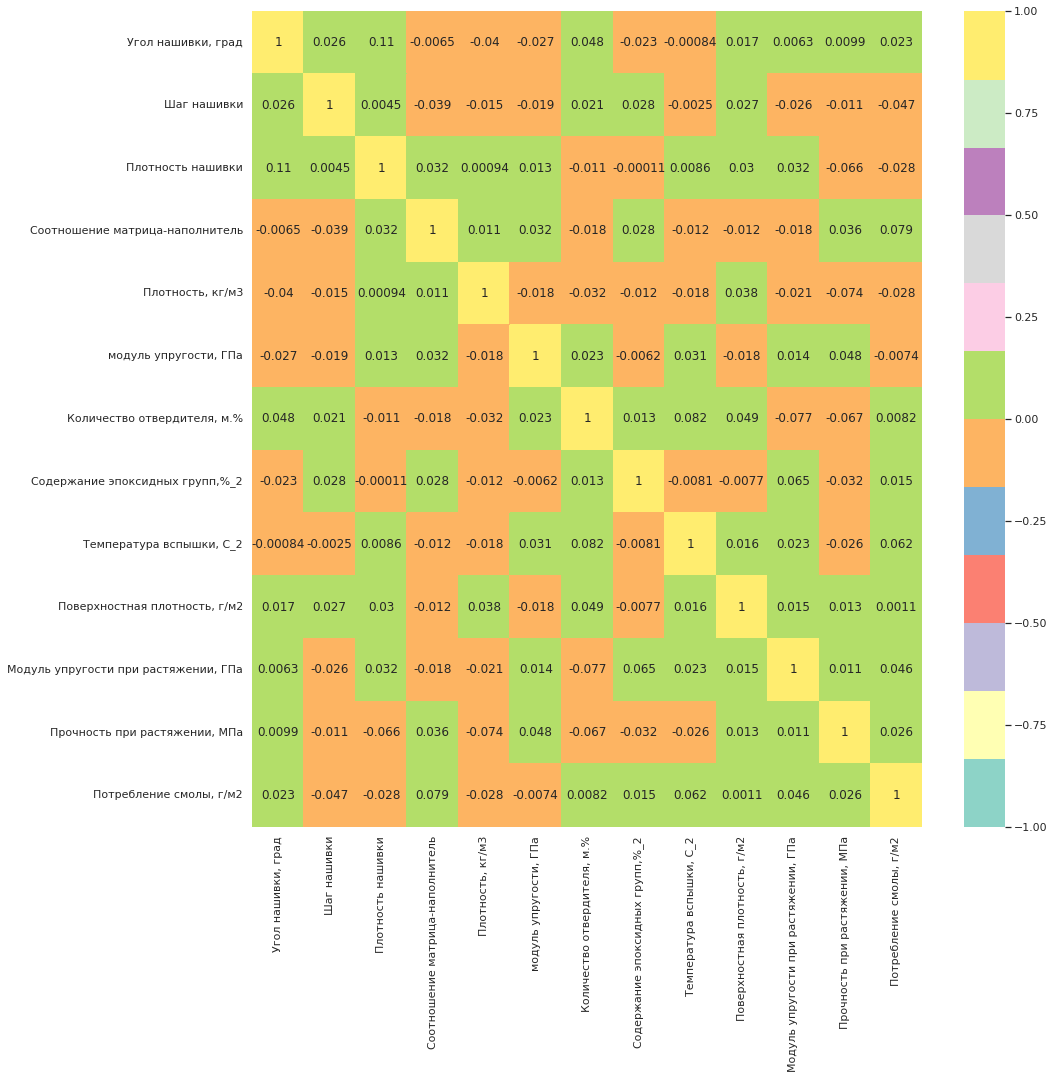

In [187]:
sns.set(rc = {'figure.figsize':(15, 15)})
sns.heatmap(db.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'Set3')

Коэффициенты находятся в промежутке значений от - 0,25 до 0,25,
таким исходные данные были предварительно обработаны и переменные являются независимыми.

# Предобработка данных и удаление выбросов

In [188]:
for column in db.columns:
  q75, q25 = np.percentile(db.loc[:, column], [75, 25])
  intr_qr = q75 - q25

  max = q75 + (1.5 * intr_qr)
  min = q25 - (1.5 * intr_qr)

  db.loc[db[column] < min, column] = np.nan
  db.loc[db[column] > max, column] = np.nan

db.isnull().sum()

Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       19
Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             11
Содержание эпоксидных групп,%_2          1
Температура вспышки, С_2                 7
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           15
Потребление смолы, г/м2                  8
dtype: int64

Удаление незначительных выбросов

In [189]:
db_used = db.dropna(axis = 0)

#Определение размера массива данных по удаления выбросов
print("Размер датасета после удаления выбросов и проверка наличия пропусков: \n",
      "\nКоличество строк в очищенном датасете: ", db_used.shape[0], 
      "\nКоличество столбцов (переменных) в очищенном датасете: ", db_used.shape[1],
      "\nКоличество пропусков в данных очищенного датасета: ", db_used.isna().sum().sum())

Размер датасета после удаления выбросов и проверка наличия пропусков: 
 
Количество строк в очищенном датасете:  916 
Количество столбцов (переменных) в очищенном датасете:  13 
Количество пропусков в данных очищенного датасета:  0


# Новые характеристики массива данных

In [190]:
db_used.describe()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,44.606987,6.889582,57.391276,2.930166,1973.895465,738.235933,110.556102,22.258294,285.622934,482.794035,73.315562,2465.755776,217.645517
std,45.022866,2.528115,11.264818,0.900148,71.022103,326.319058,27.169116,2.416730,39.902533,277.774682,3.073694,458.471383,57.627919
min,0.000000,0.145034,27.019374,0.547391,1784.482245,2.436909,35.599697,15.695894,179.374391,0.603740,65.553336,1250.392802,63.685698
25%,0.000000,5.080695,50.106239,2.331668,1923.799630,497.478057,92.479631,20.558296,258.539199,268.717312,71.233343,2149.375037,178.718030
50%,0.000000,6.899268,57.300796,2.906270,1977.119592,736.178435,110.495498,22.230761,285.700025,455.881798,73.267338,2461.249253,216.691628
75%,90.000000,8.586207,64.930896,3.551845,2019.917316,963.191095,130.311975,23.997379,313.053889,694.903763,75.399514,2755.169485,256.749159
max,90.000000,13.732404,88.072490,5.314144,2161.565216,1649.415706,181.828448,28.955094,386.067992,1291.340115,81.417126,3660.450210,359.052220


Количество строк массива данных уменьшилось. 

Необходимо выделить наиболее весомые признаки масива данных.

In [191]:
from sklearn.decomposition import PCA

In [192]:
pca = PCA(n_components = .9)
pca.fit(db_used)
print(pca.explained_variance_ratio_)

[0.51744067 0.26165235 0.18942939]


Проведем анализ с целью определения весов характеристик масива данных для первых пяти факторов влияния.

In [193]:
print(pca.components_)

[[ 1.03673806e-03 -1.35072878e-05  1.12494848e-03 -9.08639246e-05
   1.26431995e-02 -4.46976416e-02  3.24402636e-03  5.07929727e-05
   6.54927514e-04  6.40350613e-03 -1.43263805e-04 -9.98882134e-01
  -4.73536981e-03]
 [-4.24140588e-03 -2.26095374e-04  3.12766090e-04  7.93865464e-05
  -2.29074097e-04  9.96669869e-01  4.03102856e-03 -2.42162780e-05
   3.86034724e-03 -6.76087591e-02 -4.39338189e-05 -4.50159890e-02
  -1.56150028e-03]
 [ 2.01689832e-03  1.56338249e-04  1.23669308e-03  2.71806775e-05
   1.73348679e-02  6.78170133e-02  2.64045042e-03 -8.95278011e-05
   2.28082132e-03  9.97525431e-01  2.47831095e-04  3.60982422e-03
  -3.53172651e-03]]


In [194]:
print('Explained variance by component: %s' % pca.explained_variance_ratio_)

Explained variance by component: [0.51744067 0.26165235 0.18942939]


In [195]:
pca.singular_values_

array([13876.62026957,  9867.69554787,  8396.09026991])

In [196]:
pca.explained_variance_ratio_

array([0.51744067, 0.26165235, 0.18942939])

In [197]:
s = pca.transform(db_used)
s

array([[-139.18004303,  386.6795503 ,   99.77958426],
       [-155.35892042,  -41.7615163 ,   64.34516181],
       [ -12.87415155,  120.41712435, -323.17458631],
       ...,
       [-180.99674765, -346.96715983,  235.54746643],
       [ 395.86410833,   10.13904288,  158.89179474],
       [-374.83820615, -356.0882652 ,  253.74386514]])

In [198]:
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components = 2)
fa.fit(db_used)

FactorAnalysis(n_components=2)

In [199]:
pd.DataFrame(fa.components_ , columns = db.columns)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.427911,-0.008690,0.517738,-0.040815,5.644766,-10.157323,1.523961,0.023081,0.338874,1.626977,-0.066024,-458.217921,-2.148072
1,-1.339198,-0.071007,0.105815,0.027652,0.009091,325.437684,1.299344,-0.010077,1.265301,-6.145355,-0.008146,-0.058337,-0.478561


Для двух факторо выделить наименование и смысл нового фактора сложно.

In [200]:
fa = FactorAnalysis(n_components = 3)
fa.fit(db_used)

FactorAnalysis(n_components=3)

In [201]:
pd.DataFrame(fa.components_ , columns = db.columns)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,-0.692350,-0.006034,-0.486810,0.045541,-5.542351,76.010253,-1.231856,-0.024552,-0.077945,-3.867433,0.062755,448.695416,2.009907
1,-1.228355,-0.071613,0.205422,0.018705,1.112575,317.142154,1.573211,-0.004958,1.300316,-8.212116,-0.021940,-92.932360,-0.895532
2,0.614071,0.046792,0.338146,0.006208,4.507823,3.177034,0.670272,-0.024357,0.565943,277.469976,0.069575,0.818071,-0.914411


Для двух факторо выделить наименование и смысл нового фактора сложно.

In [202]:
fa = FactorAnalysis(n_components = 4)
fa.fit(db_used)

FactorAnalysis(n_components=4)

In [203]:
FactorAnalysis(n_components=4)

FactorAnalysis(n_components=4)

In [204]:
pd.DataFrame(fa.components_ , columns = db.columns)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.472048,-0.006273,0.515471,-0.041637,5.675554,-20.407124,1.484644,0.023291,0.300903,2.911782,-0.065472,-457.987689,-2.135733
1,-1.359910,-0.073987,0.100551,0.025874,-0.097212,324.846073,1.300649,-0.007783,1.235552,-23.587290,-0.014549,-14.558281,-0.487543
2,0.540818,0.042896,0.343044,0.007686,4.533216,20.624650,0.737461,-0.024851,0.631857,276.601931,0.068994,0.885916,-0.938334
3,-0.793826,-0.019310,-0.037238,0.012557,70.547330,-0.002896,-1.453844,0.002792,-1.098850,-0.136509,-0.044186,0.104436,-0.903026


Для двух факторо выделить наименование и смысл нового фактора затруднительно.

In [205]:
fa = FactorAnalysis(n_components = 5)
fa.fit(db_used)

FactorAnalysis(n_components=5)

In [206]:
FactorAnalysis(n_components=5)

FactorAnalysis(n_components=5)

In [207]:
pd.DataFrame(fa.components_, columns=db.columns)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.467843,-0.006484,0.515724,-0.041562,5.705821,-19.504130,1.487613,0.023271,0.303764,2.838371,-0.065542,-458.026406,-2.139920
1,-1.362772,-0.074089,0.098136,0.025967,-0.127430,324.841237,1.294433,-0.007777,1.232882,-24.386761,-0.014568,-13.286881,-0.480050
2,0.536069,0.042670,0.343305,0.007768,4.603299,21.553803,0.739775,-0.024870,0.634207,276.533115,0.068897,0.835386,-0.943692
3,-0.797548,-0.019094,-0.037731,0.012398,70.582531,-0.009174,-1.453705,0.002786,-1.103455,-0.413484,-0.044703,0.302439,-1.048289
4,-1.419324,0.092197,0.018345,-0.063307,-0.182133,-0.006797,0.219718,-0.007017,-1.841101,-0.013143,-0.193177,0.019189,-57.417218


Для двух факторо выделить наименование и смысл нового фактора затруднительно.

Предположительно характеристики:
* Количество отвердителя;
* Плотность нашивки,
* Плотность,
* Угол нашивки,
* Потребление смолы
являются наиболее  подходящими для построения будущих моделей.

# Нормализация масива данных

In [208]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [209]:
mms = MinMaxScaler()
db_used_norm = pd.DataFrame(mms.fit_transform(db_used), columns = db_used.columns, index = db_used.index)
db_used_norm.describe()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,0.495633,0.496384,0.497467,0.499874,0.502312,0.446757,0.512597,0.494932,0.514039,0.373578,0.489305,0.504288,0.521250
std,0.500254,0.186064,0.184508,0.188839,0.188346,0.198132,0.185799,0.182268,0.193052,0.215206,0.193755,0.190233,0.195106
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.363254,0.378144,0.374317,0.369461,0.300575,0.388979,0.366719,0.383006,0.207721,0.358049,0.373013,0.389456
50%,0.000000,0.497096,0.495985,0.494861,0.510862,0.445508,0.512182,0.492855,0.514412,0.352727,0.486265,0.502418,0.518021
75%,1.000000,0.621251,0.620960,0.630294,0.624359,0.583343,0.647699,0.626092,0.646752,0.537910,0.620670,0.624374,0.653640
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Модель для прогноза модуля упругости при растяжении

In [210]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Model_choice = pd.DataFrame(columns=['Model', 'MAE', 'R squared'])
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [211]:
db_used_norm.columns

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

In [212]:
X = db_used_norm.drop('Модуль упругости при растяжении, ГПа', axis = 1)
y = db_used_norm['Модуль упругости при растяжении, ГПа']

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 641
Размер тестовой выборки: 275


# Линейная регрессия

In [214]:
%%time
model_LN_1 = LinearRegression()
model_LN_1.fit(X_train, y_train)
y_pred = model_LN_1.predict(X_test)

CPU times: user 6.38 ms, sys: 9 µs, total: 6.39 ms
Wall time: 5.88 ms


# Случайный лес

In [215]:
%%time
random_forest = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [20, 40, 60],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,4,5,6]
}
GSCV = GridSearchCV(estimator = random_forest, param_grid = param_grid, cv = 10, verbose=0)
GSCV.fit(X_train, y_train)
GSCV.best_params_

CPU times: user 32.8 s, sys: 209 ms, total: 33.1 s
Wall time: 33.8 s


{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 60}

In [216]:
model_RFR_1 = GSCV.best_estimator_

In [217]:
%%time
model_RFR_1.fit(X_train, y_train)

CPU times: user 109 ms, sys: 0 ns, total: 109 ms
Wall time: 110 ms


RandomForestRegressor(max_depth=4, max_features='sqrt', n_estimators=60,
                      random_state=42)

In [218]:
RandomForestRegressor(max_depth=4, n_estimators=20, random_state=42)

RandomForestRegressor(max_depth=4, n_estimators=20, random_state=42)

In [219]:
model_RFR_1.predict(X_test)

array([0.50060519, 0.5086689 , 0.48791453, 0.53118014, 0.49936721,
       0.47643399, 0.51389655, 0.51237722, 0.49904607, 0.52345647,
       0.47817096, 0.50046712, 0.50858253, 0.51184433, 0.48704015,
       0.48277601, 0.46376057, 0.49091763, 0.50193068, 0.48843607,
       0.46300249, 0.47894641, 0.48410471, 0.49475485, 0.50281615,
       0.46507527, 0.50924655, 0.49420532, 0.46738726, 0.48892882,
       0.4831938 , 0.47467429, 0.50395772, 0.50190533, 0.48964842,
       0.51007489, 0.51698049, 0.51337547, 0.49587521, 0.50445944,
       0.48170453, 0.51013283, 0.49045034, 0.48344778, 0.50524391,
       0.48882137, 0.50328849, 0.53030983, 0.48878655, 0.5213173 ,
       0.50576185, 0.50363428, 0.48015906, 0.48717693, 0.49979651,
       0.52365729, 0.49939934, 0.50344933, 0.51396574, 0.55225942,
       0.48913982, 0.49924774, 0.51878507, 0.47487388, 0.46750034,
       0.4948282 , 0.50985131, 0.47648018, 0.53782314, 0.47144257,
       0.49827608, 0.51169205, 0.46292388, 0.49548555, 0.45797

In [220]:
y_test

307    0.669614
744    0.504710
158    0.708706
369    0.588353
963    0.405327
         ...   
973    0.417693
582    0.662663
841    0.414038
332    0.700179
743    0.288774
Name: Модуль упругости при растяжении, ГПа, Length: 275, dtype: float64

In [221]:
np.mean(np.abs(y_test-model_RFR_1.predict(X_test)))

0.16259285044222235

In [222]:
np.mean(np.abs(y_test-np.mean(y_test)))

0.16275846802210328

# Модель для прогноза прочности при растяжении

In [223]:
X = db_used_norm.drop('Прочность при растяжении, МПа', axis = 1)
y = db_used_norm['Прочность при растяжении, МПа']

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [225]:
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 641
Размер тестовой выборки: 275


# Линейная регрессия

In [226]:
%%time
model_LN_2 = LinearRegression()
model_LN_2.fit(X_train, y_train)
y_pred = model_LN_2.predict(X_test)

CPU times: user 8.8 ms, sys: 0 ns, total: 8.8 ms
Wall time: 10.8 ms


#  Случайный лес

In [227]:
%%time
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [20, 40, 60],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3, 4, 5, 6]
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid = param_grid, cv = 10, verbose=0)
GSCV.fit(X_train, y_train)
GSCV.best_params_

CPU times: user 32.4 s, sys: 183 ms, total: 32.6 s
Wall time: 32.7 s


{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 60}

In [228]:
model_RFR_2 = GSCV.best_estimator_

In [229]:
%%time
model_RFR_2.fit(X_train, y_train)

CPU times: user 126 ms, sys: 996 µs, total: 127 ms
Wall time: 126 ms


RandomForestRegressor(max_depth=6, max_features='sqrt', n_estimators=60,
                      random_state=42)

In [230]:
RandomForestRegressor(max_depth = 5, max_features='sqrt', n_estimators = 10,
                      random_state = 42)

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=10,
                      random_state=42)

In [231]:
model_RFR_2.predict(X_test)

array([0.48285661, 0.47881806, 0.49966449, 0.5307229 , 0.54106568,
       0.47924347, 0.4888564 , 0.44558795, 0.49707264, 0.5091193 ,
       0.49987955, 0.5764671 , 0.53383374, 0.58825734, 0.50772214,
       0.50110685, 0.51695255, 0.49578373, 0.48349888, 0.48913727,
       0.48264898, 0.51274606, 0.49405232, 0.45408335, 0.50162919,
       0.47670628, 0.42668297, 0.47771134, 0.48910617, 0.50238008,
       0.5157072 , 0.49774867, 0.594759  , 0.4850744 , 0.54102967,
       0.55803107, 0.52499071, 0.48134335, 0.50954469, 0.47912009,
       0.5977418 , 0.51902123, 0.45048216, 0.50616139, 0.47378129,
       0.46617081, 0.50556202, 0.47327528, 0.49432429, 0.51171364,
       0.49134187, 0.51821156, 0.53574504, 0.5136135 , 0.50814737,
       0.52379716, 0.50726151, 0.48604344, 0.49420331, 0.56508603,
       0.46911018, 0.49981066, 0.44474526, 0.52190056, 0.49190899,
       0.46952825, 0.48901588, 0.56358586, 0.51386357, 0.51690615,
       0.48464208, 0.49817607, 0.56922236, 0.45688551, 0.48729

In [232]:
y_test

307    0.461411
744    0.739954
158    0.619034
369    0.599236
963    0.403838
         ...   
973    0.476721
582    0.782085
841    0.390063
332    0.550036
743    0.608053
Name: Прочность при растяжении, МПа, Length: 275, dtype: float64

In [233]:
np.mean(np.abs(y_test-model_RFR_2.predict(X_test)))

0.16047064978075

In [234]:
np.mean(np.abs(y_test-np.mean(y_test)))

0.15636772720700565

In [235]:
def come_data(model):
    predicted = model.predict(X_test)
    return (
            mean_absolute_error(predicted, y_test), 
            r2_score(predicted, y_test)
           )
                      
models_res = [come_data(model_LN_1), come_data(model_RFR_1), come_data(model_LN_2), come_data(model_RFR_2)]
res_data = {'наименование модели': ['Линейная регрессия_МУ', 'Случайный лес_МУ', 'Линейная регрессия_ПР', 'Случайный лес_ПР'], 
            'mean_absolute_error'   : [model_res[0] for model_res in models_res], 
            'r2_score'  : [model_res[1] for model_res in models_res]
       }
pd.DataFrame(res_data)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Модуль упругости при растяжении, ГПа
Feature names seen at fit time, yet now missing:
- Прочность при растяжении, МПа

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Модуль упругости при растяжении, ГПа
Feature names seen at fit time, yet now missing:
- Прочность при растяжении, МПа

  warnings.warn(message, FutureWarning)


,наименование модели,mean_absolute_error,r2_score
0,Линейная регрессия_МУ,0.158679,-45.822286
1,Случайный лес_МУ,0.157752,-108.910344
2,Линейная регрессия_ПР,0.158731,-38.081027
3,Случайный лес_ПР,0.160471,-31.711858


ннннyyyydsdinudfdfasdfsd# Нейросеть для рекомендации соотношение матрица-наполнитель

In [236]:
db_used = db_used.reset_index(drop = True)
X = db_used.drop('Соотношение матрица-наполнитель', axis = 1)
y = db_used['Соотношение матрица-наполнитель']

In [237]:
X

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,4.000000,57.000000,1953.274926,1136.596135,137.627420,22.344534,234.716883,555.893453,80.803222,2587.342983,246.613117
1,0.0,4.000000,70.000000,2037.631811,707.570887,101.617251,23.146393,312.307205,547.601219,73.817067,2624.026407,178.198556
2,0.0,5.000000,47.000000,2018.220332,836.294382,135.401697,26.435515,327.510377,150.961449,77.210762,2473.187195,123.344561
3,0.0,5.000000,57.000000,1917.907506,478.286247,105.786930,17.874100,328.154579,526.692159,72.345709,3059.032991,275.575880
4,0.0,5.000000,60.000000,1892.071124,641.052549,96.563293,22.989291,262.956722,804.592621,74.511359,2288.967377,126.816339
...,...,...,...,...,...,...,...,...,...,...,...,...
911,90.0,7.626517,45.148175,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
912,90.0,5.652525,53.622746,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
913,90.0,7.812506,62.702042,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
914,90.0,4.843831,40.734359,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [238]:
y

0      2.587348
1      2.046471
2      1.856476
3      3.305535
4      2.709554
         ...   
911    2.271346
912    3.444022
913    3.280604
914    3.705351
915    3.808020
Name: Соотношение матрица-наполнитель, Length: 916, dtype: float64

In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [240]:
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 641
Размер тестовой выборки: 275


In [241]:
X_train

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
245,0.0,7.407166,62.806230,1911.931680,955.175762,77.952151,20.968753,310.726683,330.922384,77.106056,1811.607492,291.531021
257,0.0,3.711140,53.112074,1982.377729,1152.883022,102.653478,20.069592,257.782207,814.741122,78.629422,2748.405735,220.730316
161,0.0,3.717015,54.605554,1927.767886,671.632245,91.430609,22.830797,343.958148,225.523884,65.793845,3342.802059,305.705805
654,90.0,3.337763,50.547796,1987.700316,629.189776,139.342427,19.151985,304.039184,829.254993,71.744963,2576.325922,197.398991
553,90.0,4.397985,57.207378,1936.877106,1372.830744,115.390951,24.350604,293.844799,341.071010,77.762205,2854.913992,239.208597
...,...,...,...,...,...,...,...,...,...,...,...,...
767,90.0,8.702715,61.560521,2019.706055,1102.296588,167.194048,18.437271,346.658339,143.236948,67.626416,1985.264508,199.399819
72,0.0,5.764377,73.353526,1825.952497,901.708222,112.556323,20.435557,278.428993,495.483404,72.325588,2401.522319,128.471904
908,90.0,6.908628,63.737055,1872.864660,996.018683,146.199194,21.559290,313.900486,799.634090,72.815552,2443.482888,307.265172
235,0.0,2.841129,76.390449,1993.895160,71.616771,85.209924,19.984568,256.479710,856.912395,72.024494,3005.031002,161.525674


In [242]:
target = np.array(X_train)
target_normalizer = layers.Normalization(input_shape=[12,], axis = None)
target_normalizer.adapt(target)
target

array([[0.00000000e+00, 7.40716586e+00, 6.28062301e+01, ...,
        7.71060559e+01, 1.81160749e+03, 2.91531021e+02],
       [0.00000000e+00, 3.71113954e+00, 5.31120738e+01, ...,
        7.86294221e+01, 2.74840573e+03, 2.20730316e+02],
       [0.00000000e+00, 3.71701487e+00, 5.46055537e+01, ...,
        6.57938450e+01, 3.34280206e+03, 3.05705805e+02],
       ...,
       [9.00000000e+01, 6.90862801e+00, 6.37370548e+01, ...,
        7.28155521e+01, 2.44348289e+03, 3.07265172e+02],
       [0.00000000e+00, 2.84112856e+00, 7.63904488e+01, ...,
        7.20244939e+01, 3.00503100e+03, 1.61525674e+02],
       [0.00000000e+00, 6.67578034e+00, 7.86232993e+01, ...,
        7.01028945e+01, 3.00469657e+03, 1.94853057e+02]])

In [243]:
target_normalizer

In [244]:
import datetime

In [245]:
def compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(256, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(64, activation='linear'), 
      layers.Dense(1)
    ])

    model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.0005))
    return model

In [246]:
target_model = compile_model(target_normalizer)
target_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 12)               3         
 ion)                                                            
                                                                 
 dense_8 (Dense)             (None, 256)               3328      
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 85,636
Trainable params: 85,633
Non-trainable params: 3
__________________________________________________

In [247]:
%%time
epochs = target_model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    verbose = 1, epochs = 20)

Epoch 1/20
16/16 [==============================] - 1s 20ms/step - loss: 3.0614 - val_loss: 1.0830
Epoch 2/20
16/16 [==============================] - 0s 7ms/step - loss: 0.9999 - val_loss: 0.9738
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 0.8581 - val_loss: 0.8114
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.7985 - val_loss: 0.7970
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.7907 - val_loss: 0.7915
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.7794 - val_loss: 0.7852
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.7812 - val_loss: 0.7901
Epoch 8/20
16/16 [==============================] - 0s 11ms/step - loss: 0.7980 - val_loss: 0.7588
Epoch 9/20
16/16 [==============================] - 0s 11ms/step - loss: 0.7824 - val_loss: 0.7954
Epoch 10/20
16/16 [==============================] - 0s 12ms/step - loss: 0.7937 - val_loss: 0.8436
Epoch 11/2

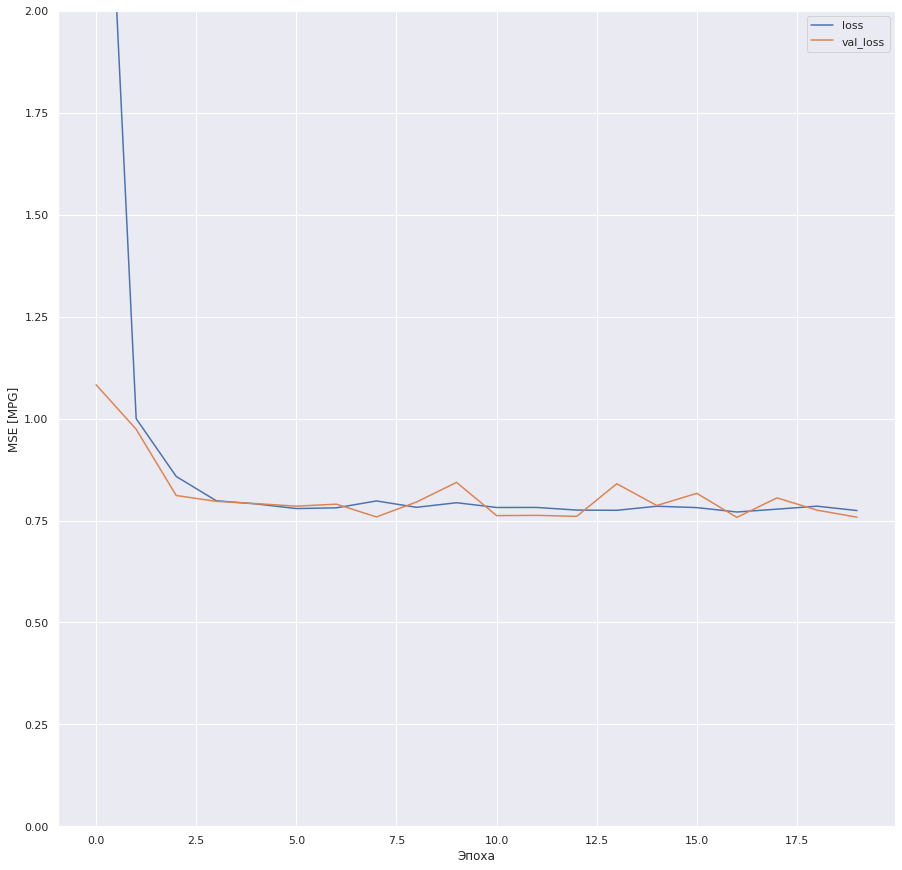

In [248]:
def loss(epochs):
    plt.plot(epochs.history['loss'], label = 'loss')
    plt.plot(epochs.history['val_loss'], label = 'val_loss')
    plt.ylim([0, 2])
    plt.xlabel('Эпоха')
    plt.ylabel('MSE [MPG]')
    plt.legend()
    plt.grid(True)

loss(epochs)

In [249]:
X_test

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
274,0.0,9.674629,60.163069,1924.205209,1228.224016,96.563369,19.803201,276.318476,677.951094,76.175952,2362.418794,220.624186
674,90.0,4.025663,54.837548,1976.868448,630.925295,136.600341,25.027039,280.842690,590.865535,73.559943,3033.723583,233.705451
142,0.0,6.781771,43.337652,2016.644723,897.973793,121.200632,23.460348,243.702758,352.106018,76.796100,2742.299965,249.371318
331,0.0,8.779019,43.709842,2064.644261,933.835041,106.898372,22.272400,348.049052,950.685384,74.886839,2694.586007,330.728529
881,90.0,7.410758,50.568878,2016.191577,790.467153,99.558219,20.224393,250.536788,995.196277,71.983363,2223.664449,190.597751
...,...,...,...,...,...,...,...,...,...,...,...,...
891,90.0,3.488630,48.773365,2051.985270,598.509918,80.562969,21.160317,268.309721,474.542057,72.179526,2399.318374,312.536052
522,90.0,3.703375,54.092673,1987.787140,569.930605,76.426670,23.348416,346.137893,641.922189,76.065686,3135.262653,234.932782
766,90.0,8.584800,43.918629,1850.473510,1159.930707,82.865480,21.688738,292.738119,611.405489,72.121553,2190.466468,195.396895
298,0.0,6.484849,39.334262,1894.104387,893.566406,84.497760,20.219764,220.414118,515.699789,76.660835,2576.011504,214.105100


In [250]:
y_test.head(5)

274    1.483352
674    2.548177
142    3.059959
331    2.496519
881    4.266124
Name: Соотношение матрица-наполнитель, dtype: float64

In [251]:
len(y_test)

275

9/9 [==============================] - 0s 4ms/step


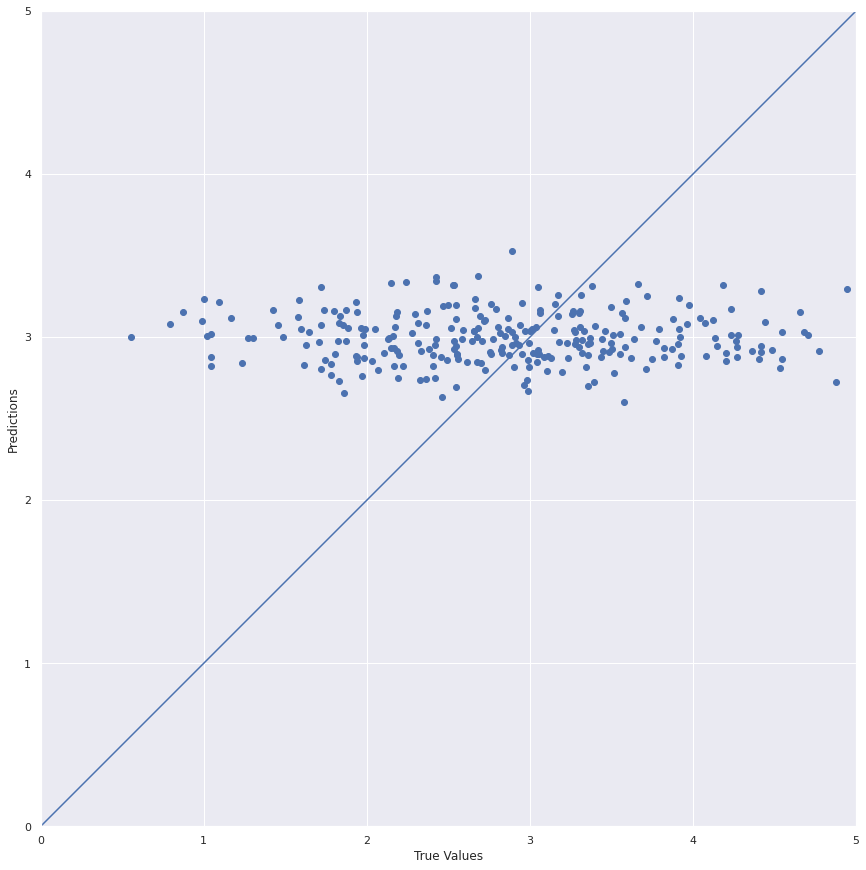

In [252]:
test_predictions = target_model.predict(X_test).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [253]:
test_predictions

array([2.998764 , 3.1124728, 3.1470761, 3.1946702, 2.9772348, 2.7988102,
       2.8724399, 3.0547194, 2.8333611, 3.0558677, 3.0926616, 2.7972145,
       2.8119242, 2.8711605, 2.8631287, 2.9784765, 3.0495205, 2.973299 ,
       2.961269 , 3.050056 , 3.0967448, 3.0111094, 2.93576  , 3.1892695,
       2.912902 , 2.917525 , 2.9958162, 3.0488796, 2.9693952, 2.8850427,
       2.9193435, 2.937849 , 3.0281324, 3.0394523, 2.894298 , 2.824686 ,
       2.9545531, 2.847382 , 3.3097925, 3.0605068, 2.8687315, 3.1581342,
       3.063995 , 2.8564634, 2.9536567, 3.0196514, 2.9099648, 2.9754949,
       3.0724397, 2.8754773, 2.8981657, 2.9462051, 3.1114964, 2.7296329,
       3.256556 , 3.0305982, 2.8926675, 2.880229 , 2.9281025, 2.940862 ,
       3.1219225, 3.2033203, 2.9871693, 2.957139 , 3.0493298, 2.8506281,
       2.9162946, 2.9230332, 3.1726522, 3.014047 , 2.932547 , 3.2568152,
       2.7382126, 2.863763 , 2.8899078, 3.0350847, 3.1615937, 2.958675 ,
       3.209784 , 2.8792686, 2.743938 , 2.603026 , 

In [254]:
len(test_predictions)

275

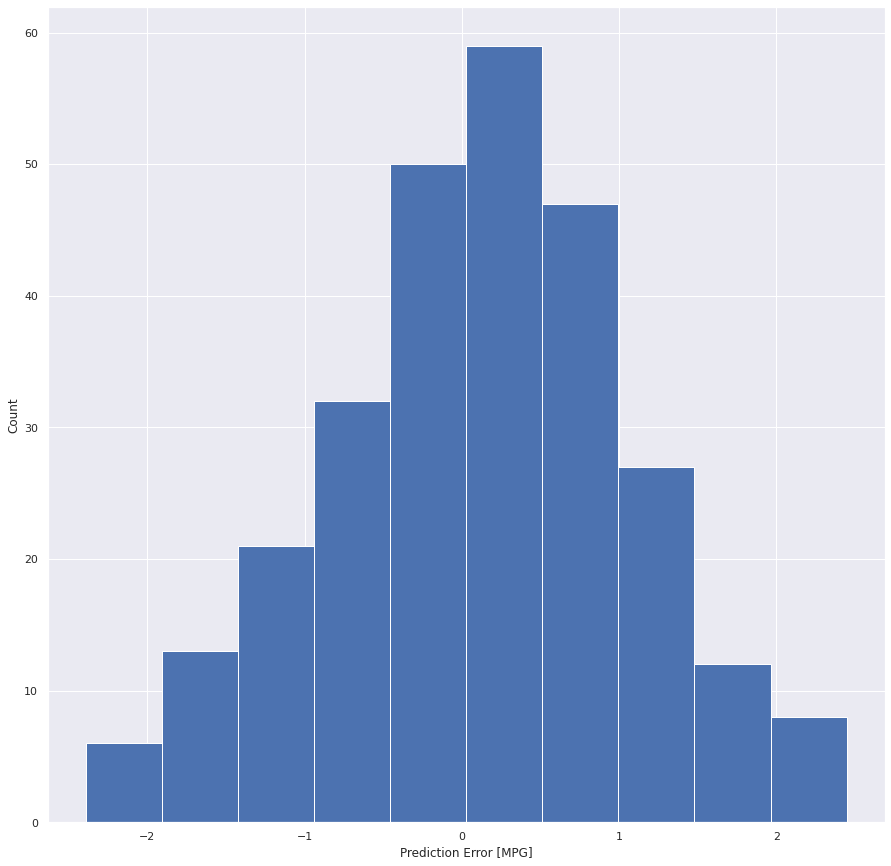

In [255]:
error = test_predictions - y_test
plt.hist(error, bins = 10)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

# Сохранение модели

In [256]:
import pickle
lr = LinearRegression()
pickle.dump(lr, open('lr_model.pkl', 'wb'))

In [260]:
model_load = pickle.load(open('/content/lr_model.pkl', 'rb'))